# **Data Analytics | Python Task**

# Name: Srikar Bajjuri
# Details: VIT - 20MIC0106

Dataset - "Global-Superstore"
Data source : https://docs.google.com/spreadsheets/d/1KagwoQLy1quKvT_82amuS-x3UnsoIX4J6p02ewbjQNA/edit?usp=sharing


*   Data Exploration: Thoroughness in understanding the dataset and initial insights.
*   Data Visualization: Clarity, accuracy, and effectiveness of visualizations.

__________________________________________________________________________
To perform this given task we will be following the below main steps:
1. libraries importing and initialization
2. Dataset loading
3. Pre-processing and cleaning of dataset
4. Main Exploration Analysis;
   *   EDA - Exploration and data analysis
   *   DV - Data Visualization
5. Feature Engineering and visualizaton






## KEYWORDS IN THE DOCUMENT
EDA - Exploratory Data Analysis

VIZ - Visualization



# 1. libraries importing and initialization

In [ ]:
#basic libraries
!pip install chart_studio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
%matplotlib inline

# for datetime operations
import datetime as dt

# pandas general settings
pd.options.display.max_columns = None

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 580.7 kB/s eta 0:00:00


# 2. Dataset loading

In [ ]:
#loading dataset
df = pd.read_csv("/content/Global-Superstore-Global-Superstore.csv",encoding='unicode_escape')

In [ ]:
#displaying dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


# 3. Pre-processing and cleaning of dataset

In [ ]:
#size of the dataset
def sizecheck_df(df):
    print("#### Size of the dataset ####")
    print(df.shape)
sizecheck_df(df)

#### Size of the dataset ####
(51290, 24)


In [ ]:
#count of unique values per attribute
def uniquevaluescheck_df(df):
    print("#### Size of the dataset ####")
    print(df.nunique())
uniquevaluescheck_df(df)

#### Size of the dataset ####
Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64


In [ ]:
#dataset information
def infocheck_df(df):
    print("#### Info of the dataset ####")
    print(df.info())
infocheck_df(df)

#### Info of the dataset ####
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  P

In [ ]:
#datatype checking
def check_type(df):
    print("#### Datatype ####")
    print(df.dtypes)

check_type(df)

#### Datatype ####
Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object


In [ ]:
#missing values handling
def check_missingvalues(df):
    print("#### Missing Values ####")
    print(df.isnull().sum())

check_missingvalues(df)

#### Missing Values ####
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [ ]:
#zero values handling
def check_zerovalues(df):
    print("#### Zero Values ####")
    print(df.isin([0]).sum())

check_zerovalues(df)

#### Zero Values ####
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code           0
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount          29009
Profit              668
Shipping Cost         2
Order Priority        0
dtype: int64


In [ ]:
#dropping Postal code colunm as it is not required in this EDA
try:
    df.drop("Postal Code", axis=1, inplace=True)
except:
    print('ok')
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [ ]:
#duplicates handling
def check_duplicates(df):
    print("#### Duplicates ####")
    print(df.duplicated().sum())
check_duplicates(df)

#### Duplicates ####
0


In [ ]:
#to get basic arthmetic summary of dataset
summary_stats = df.describe()
summary_stats

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


# 4. Main Exploration Analysis;
EDA - Exploration and data analysis
DV - Data Visualization

In [ ]:
#libraries for visualization
sns.set(style="whitegrid")

**1. Sales and Profit Analysis**

    Total Sales by Category: Sum of sales for each product category.

    Sales by Region: Sales distribution across different regions.

    Sales Trend Over Time: Monthly/quarterly/yearly sales trends.

In [ ]:
# Sales and Profit by Category and Sub-Category [EDA]
category_sales_profit = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().reset_index()
category_sales_profit

,Category,Sub-Category,Sales,Profit
0,Furniture,Bookcases,1.466572e+06,161924.41950
1,Furniture,Chairs,1.501682e+06,140396.26750
2,Furniture,Furnishings,3.855783e+05,46967.42550
3,Furniture,Tables,7.570419e+05,-64083.38870
4,Office Supplies,Appliances,1.011064e+06,141680.58940
5,Office Supplies,Art,3.720920e+05,57953.91090
6,Office Supplies,Binders,4.619115e+05,72449.84600
7,Office Supplies,Envelopes,1.709043e+05,29601.11630
8,Office Supplies,Fasteners,8.324232e+04,11525.42410
9,Office Supplies,Labels,7.340403e+04,15010.51200


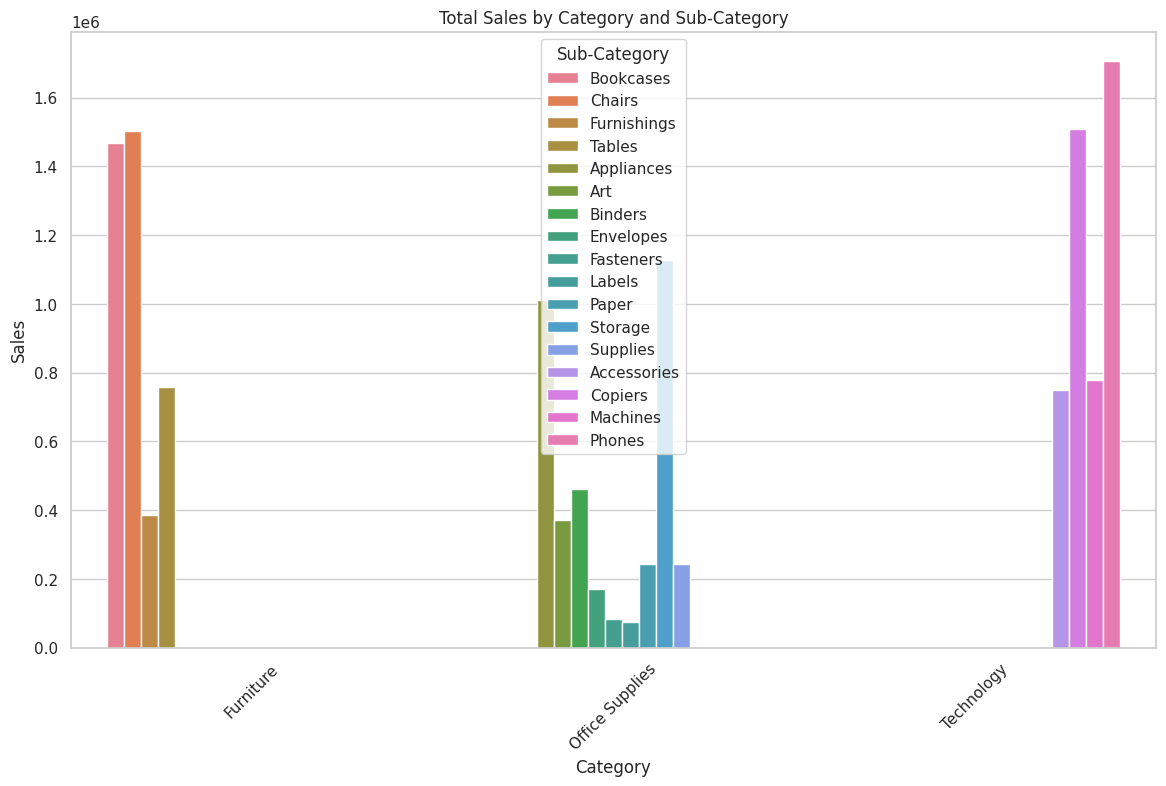

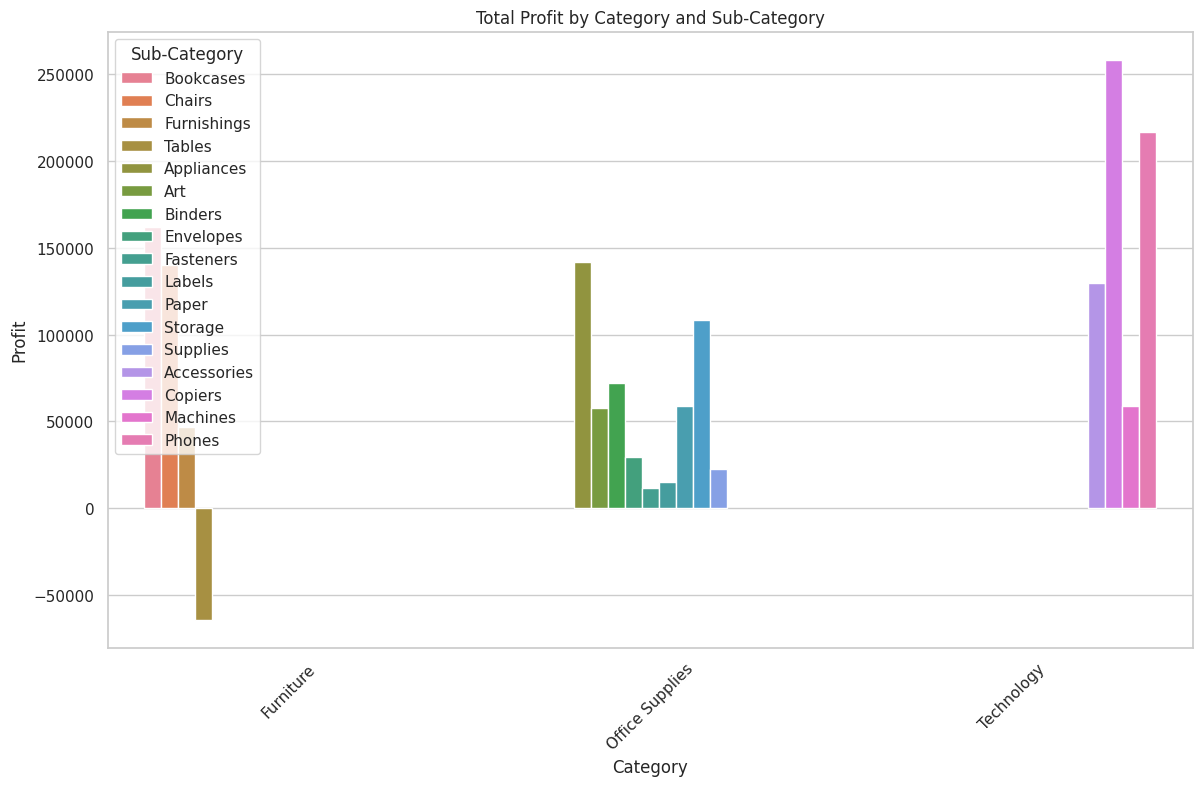

In [ ]:
# Sales and profit by Category and Sub-Category Analysis [VIZ]
plt.figure(figsize=(14, 8))
sns.barplot(data=category_sales_profit, x='Category', y='Sales', hue='Sub-Category')
plt.title('Total Sales by Category and Sub-Category')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(data=category_sales_profit, x='Category', y='Profit', hue='Sub-Category')
plt.title('Total Profit by Category and Sub-Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Sales and Profit by Category [EDA]
category_sales_profit = df.groupby(['Category'])[['Sales', 'Profit']].sum().reset_index()
category_sales_profit

,Category,Sales,Profit
0,Furniture,4.110874e+06,285204.72380
1,Office Supplies,3.787070e+06,518473.83430
2,Technology,4.744557e+06,663778.73318


In [ ]:
# Sales and Profit by Sub Category [EDA]
category_sales_profit = df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum().reset_index()
category_sales_profit

,Sub-Category,Sales,Profit
0,Accessories,7.492370e+05,129626.30620
1,Appliances,1.011064e+06,141680.58940
2,Art,3.720920e+05,57953.91090
3,Binders,4.619115e+05,72449.84600
4,Bookcases,1.466572e+06,161924.41950
5,Chairs,1.501682e+06,140396.26750
6,Copiers,1.509436e+06,258567.54818
7,Envelopes,1.709043e+05,29601.11630
8,Fasteners,8.324232e+04,11525.42410
9,Furnishings,3.855783e+05,46967.42550


In [ ]:
# Sales and Profit by Region [EDA]
region_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()
region_sales_profit

,Region,Sales,Profit
0,Africa,7.837732e+05,88871.63100
1,Canada,6.692817e+04,17817.39000
2,Caribbean,3.242809e+05,34571.32104
3,Central,2.822303e+06,311403.98164
4,Central Asia,7.528266e+05,132480.18700
5,EMEA,8.061613e+05,43897.97100
6,East,6.787812e+05,91522.78000
7,North,1.248166e+06,194597.95252
8,North Asia,8.483098e+05,165578.42100
9,Oceania,1.100185e+06,120089.11200


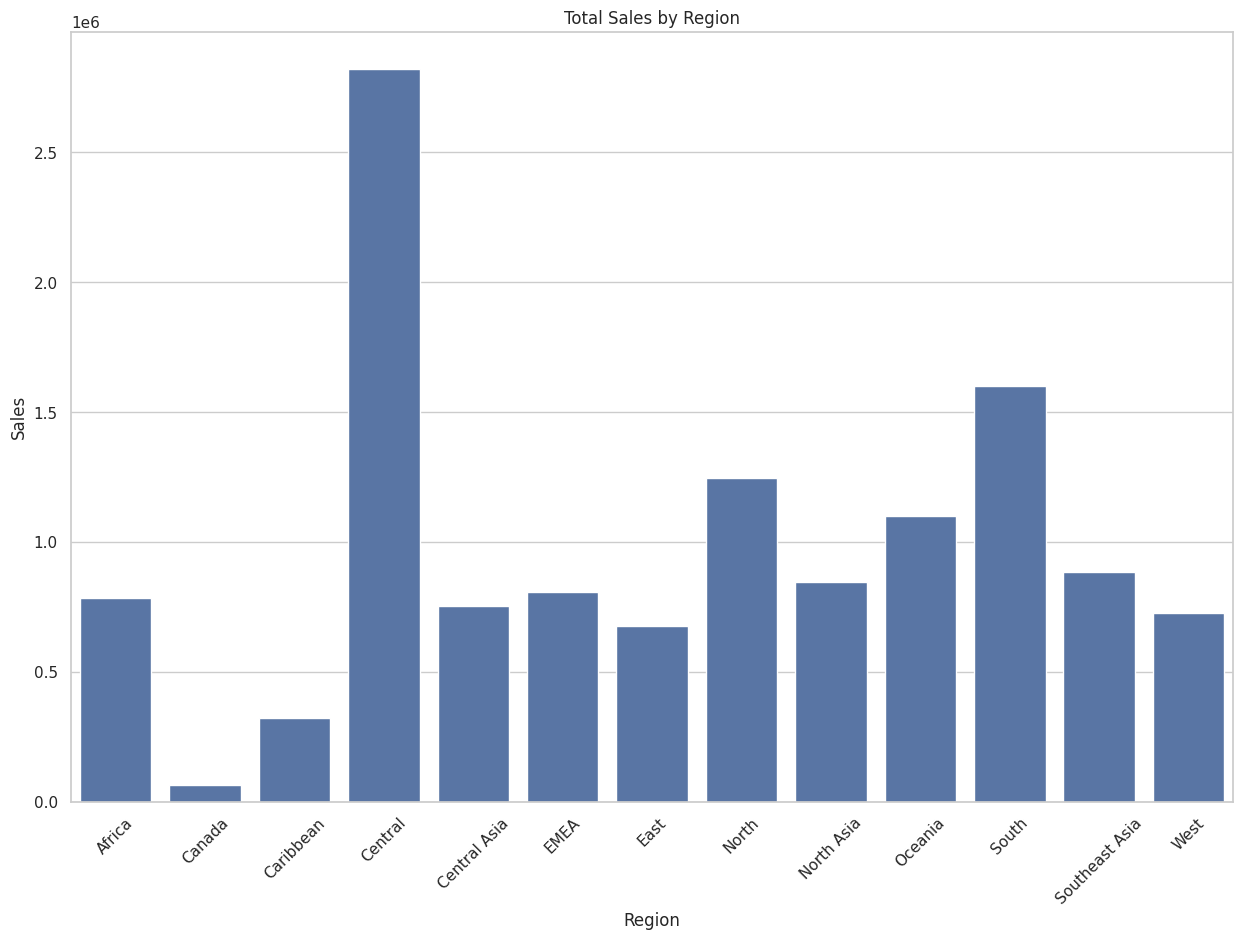

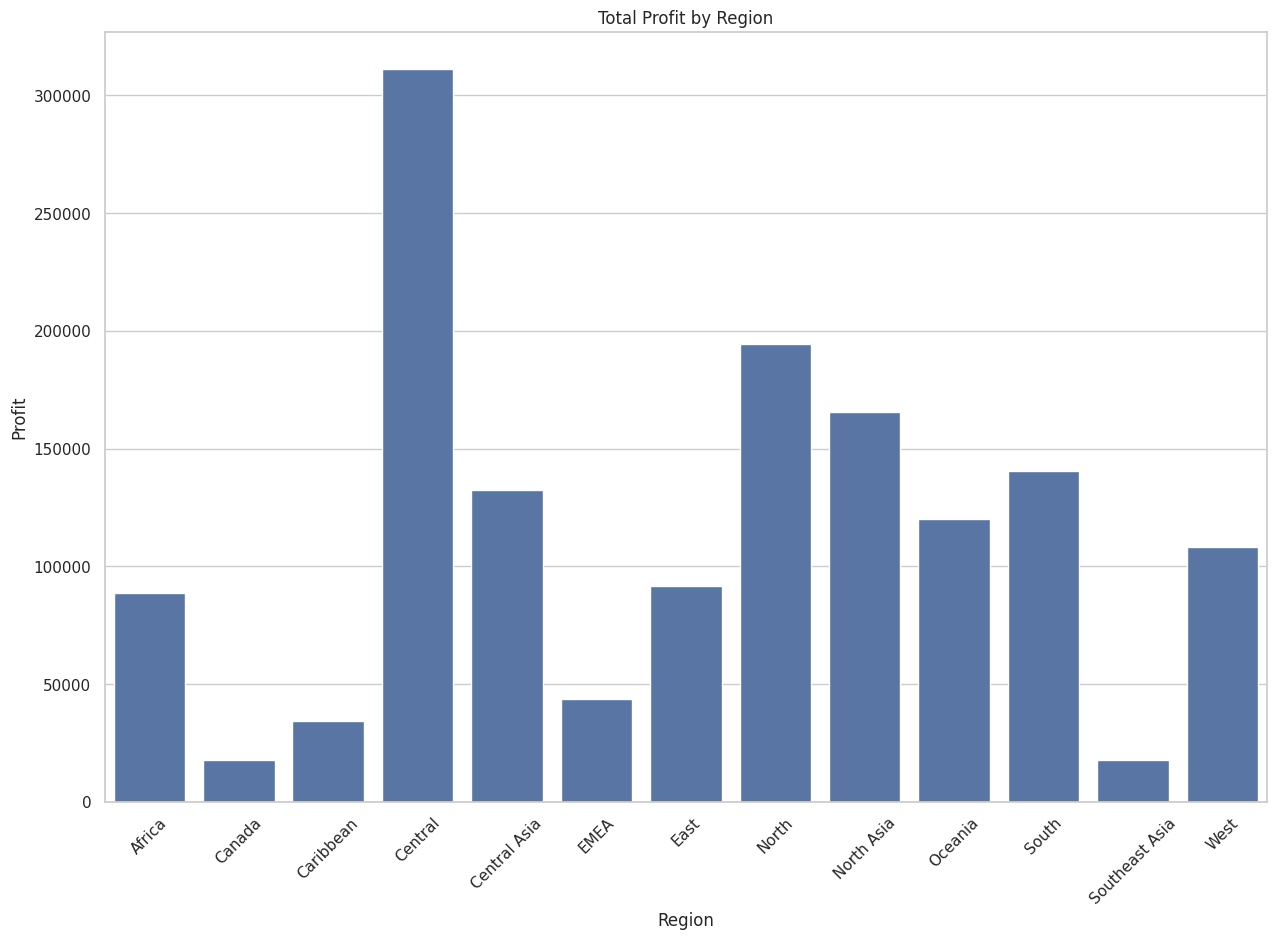

In [ ]:
# Geographic Analysis [VIZ]
plt.figure(figsize=(15, 10))
sns.barplot(data=region_sales_profit, x='Region', y='Sales')
plt.title('Total Sales by Region')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 10))
sns.barplot(data=region_sales_profit, x='Region', y='Profit')
plt.title('Total Profit by Region')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Convert Order Date to datetime format [EDA]
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Sales and Profit over time (monthly)
sales_trend_monthly = df.resample('M', on='Order Date')[['Sales', 'Profit']].sum().reset_index()
sales_trend_monthly

,Order Date,Sales,Profit
0,2011-01-31,98898.48886,8321.80096
1,2011-02-28,91152.15698,12417.90698
2,2011-03-31,145729.36736,15303.56826
3,2011-04-30,116915.76418,12902.32438
4,2011-05-31,146747.83610,12183.82870
5,2011-06-30,215207.38022,23415.24702
6,2011-07-31,115510.41912,5585.00352
7,2011-08-31,207581.49122,23713.66772
8,2011-09-30,290214.45534,35776.88394
9,2011-10-31,199071.26404,25963.41834


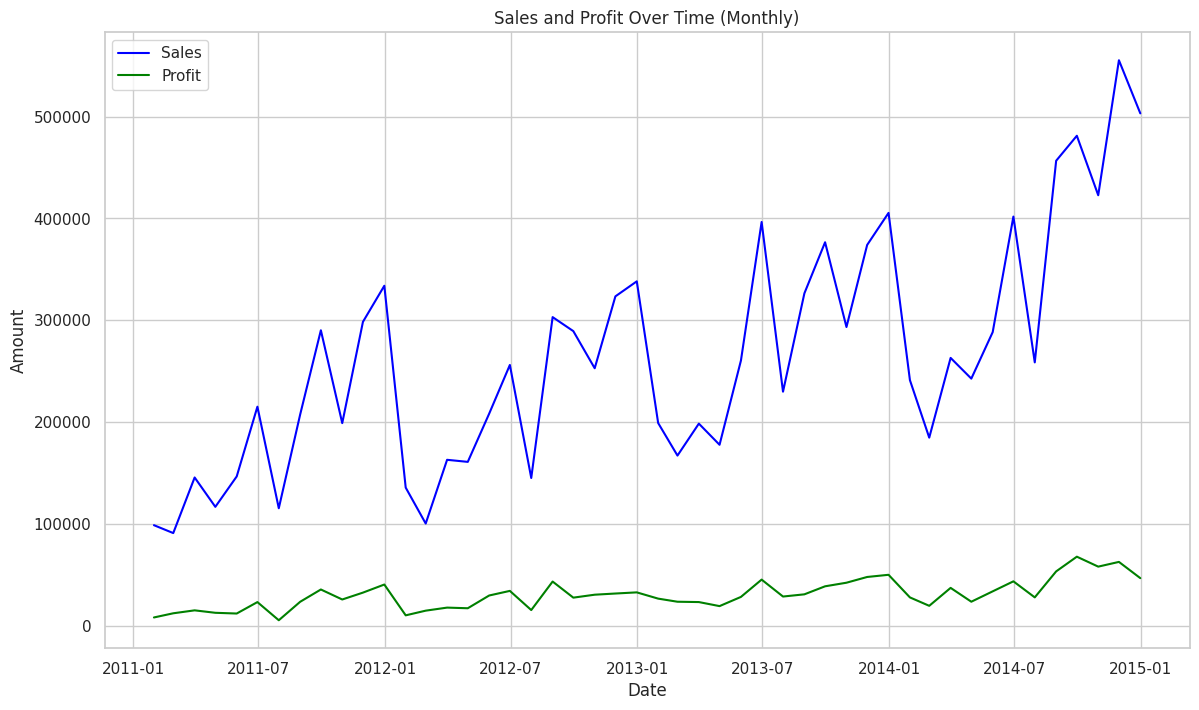

In [ ]:
# Sales and Profit over time (monthly) [VIZ]
plt.figure(figsize=(14, 8))
plt.plot(sales_trend_monthly['Order Date'], sales_trend_monthly['Sales'], label='Sales', color='blue')
plt.plot(sales_trend_monthly['Order Date'], sales_trend_monthly['Profit'], label='Profit', color='green')
plt.title('Sales and Profit Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [ ]:
# Sales and Profit over time (quarterly) [EDA]
sales_trend_quarterly = df.resample('Q', on='Order Date')[['Sales', 'Profit']].sum().reset_index()
sales_trend_quarterly

,Order Date,Sales,Profit
0,2011-03-31,3.357800e+05,36043.27620
1,2011-06-30,4.788710e+05,48501.40010
2,2011-09-30,6.133064e+05,65075.55518
3,2011-12-31,8.314935e+05,99320.58006
4,2012-03-31,3.993677e+05,43394.65138
5,2012-06-30,6.255929e+05,81650.82458
6,2012-09-30,7.377689e+05,86935.44734
7,2012-12-31,9.147092e+05,95434.35580
8,2013-03-31,5.650196e+05,74006.83040
9,2013-06-30,8.348395e+05,93436.14594


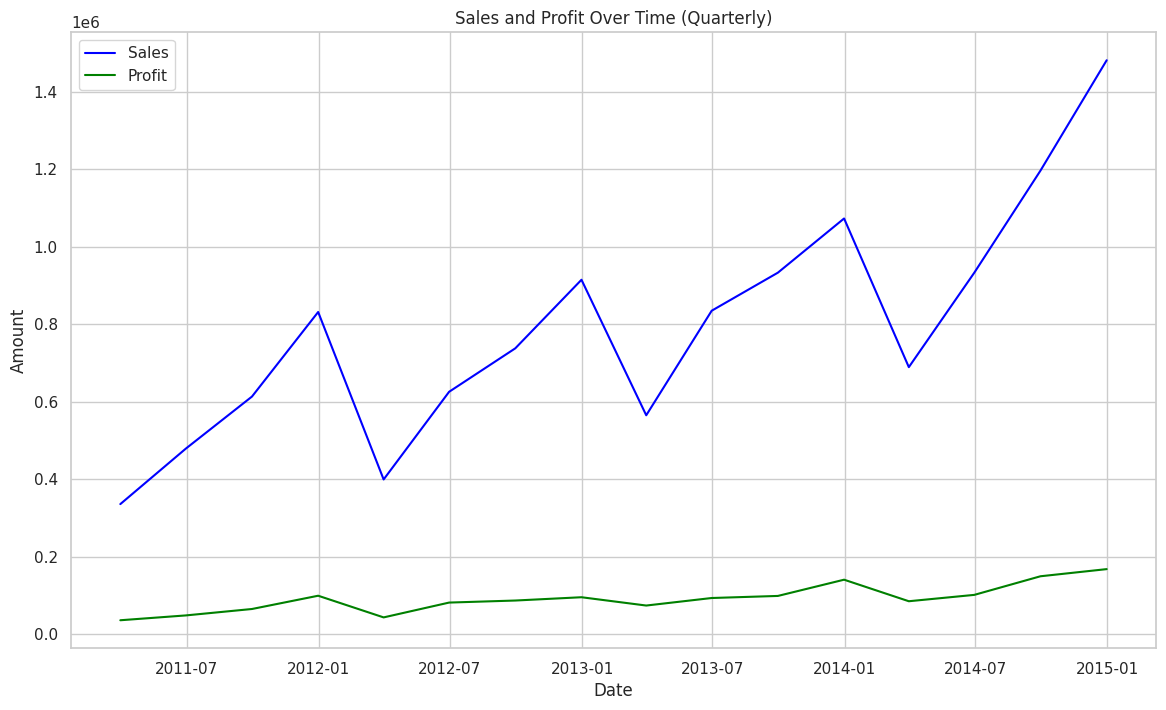

In [ ]:
# Sales and Profit over time (quarterly) [VIZ]
plt.figure(figsize=(14, 8))
plt.plot(sales_trend_quarterly['Order Date'], sales_trend_quarterly['Sales'], label='Sales', color='blue')
plt.plot(sales_trend_quarterly['Order Date'], sales_trend_quarterly['Profit'], label='Profit', color='green')
plt.title('Sales and Profit Over Time (Quarterly)')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [ ]:
# Sales and Profit over time (yearly) [EDA]
sales_trend_yearly = df.resample('Y', on='Order Date')[['Sales', 'Profit']].sum().reset_index()
sales_trend_yearly

,Order Date,Sales,Profit
0,2011-12-31,2.259451e+06,248940.81154
1,2012-12-31,2.677439e+06,307415.27910
2,2013-12-31,3.405746e+06,406935.23018
3,2014-12-31,4.299866e+06,504165.97046


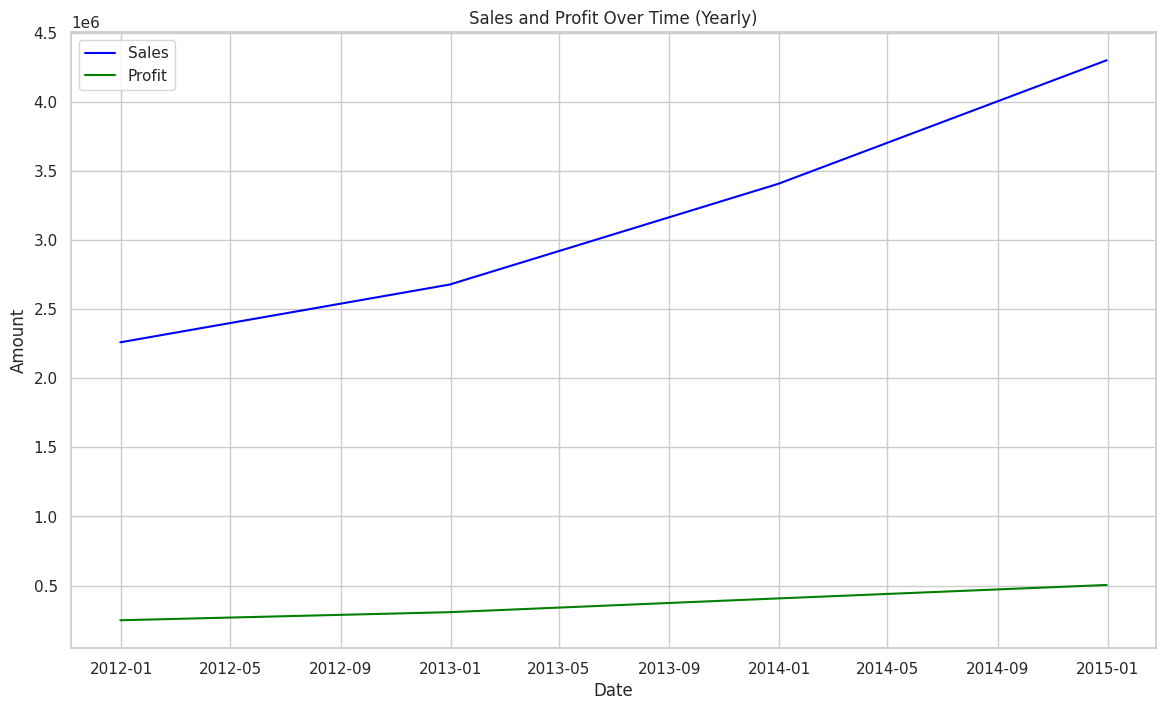

In [ ]:
# Sales and Profit over time (yearly) [VIZ]
plt.figure(figsize=(14, 8))
plt.plot(sales_trend_yearly['Order Date'], sales_trend_yearly['Sales'], label='Sales', color='blue')
plt.plot(sales_trend_yearly['Order Date'], sales_trend_yearly['Profit'], label='Profit', color='green')
plt.title('Sales and Profit Over Time (Yearly)')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

**2. Customer Analysis**

    Top 10 Customers: Identify customers with the highest total sales.

    Customer Segmentation: Categorize customers based on segments and analyze their purchasing behavior.

    Geographic Distribution: Distribution of customers across different cities, states, and countries.


In [ ]:
# Top Customers by Total Sales [EDA]
top_customers = df.groupby('Customer Name')[['Sales']].sum().reset_index()
top_customers = top_customers.sort_values(by='Sales', ascending=False).head(10)
top_customers

,Customer Name,Sales
758,Tom Ashbrook,40488.07080
731,Tamara Chand,37457.33300
313,Greg Tran,35550.95428
157,Christopher Conant,35187.07640
687,Sean Miller,35170.93296
73,Bart Watters,32310.44650
558,Natalie Fritzler,31781.25850
290,Fred Hopkins,30400.67452
347,Jane Waco,30288.45030
335,Hunter Lopez,30243.56658


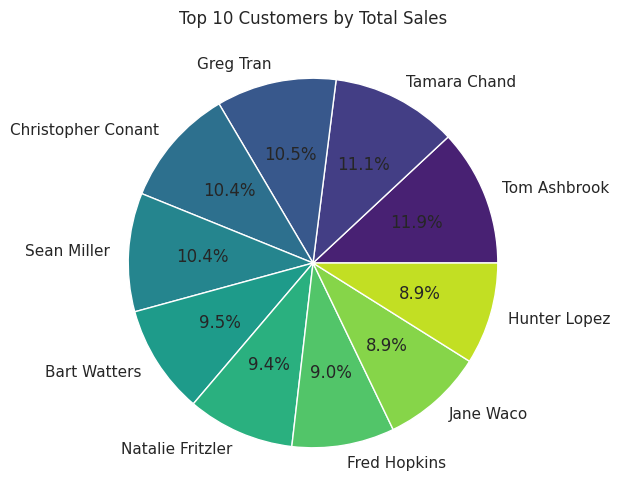

In [ ]:
# Top Customers by Total Sales [VIZ]
plt.figure(figsize=(12, 6))
sizes = top_customers['Sales']
labels = top_customers['Customer Name']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(top_customers)))
plt.title('Top 10 Customers by Total Sales')
plt.show()

In [ ]:
# Sales and Profit by Customer Segment [EDA]
segment_analysis = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()
segment_analysis

,Segment,Sales,Profit
0,Consumer,6.507949e+06,749239.78206
1,Corporate,3.824698e+06,441208.32866
2,Home Office,2.309855e+06,277009.18056


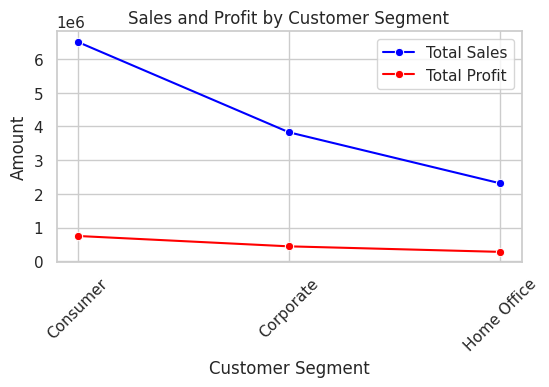

In [ ]:
plt.figure(figsize=(6, 3))

# Line chart for Sales by Customer Segment [VIZ]
sns.lineplot(data=segment_analysis, x='Segment', y='Sales', marker='o', color='blue', label='Total Sales')

# Line chart for Profit by Customer Segment
sns.lineplot(data=segment_analysis, x='Segment', y='Profit', marker='o', color='red', label='Total Profit')

plt.title('Sales and Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
# Distribution of Customers by City [EDA]
city_distribution = df['City'].value_counts().reset_index()
city_distribution.columns = ['City', 'Number of Customers']
city_distribution = city_distribution.sort_values(by='Number of Customers', ascending=False).head(10)
city_distribution

,City,Number of Customers
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Santo Domingo,443
5,Manila,432
6,Seattle,428
7,Houston,377
8,Tegucigalpa,362
9,Jakarta,337


In [ ]:
# Distribution of Customers by State [EDA]
state_distribution = df['State'].value_counts().reset_index()
state_distribution.columns = ['State', 'Number of Customers']
state_distribution = state_distribution.sort_values(by='Number of Customers', ascending=False).head(10)
state_distribution

,State,Number of Customers
0,California,2001
1,England,1499
2,New York,1128
3,Texas,985
4,Ile-de-France,981
5,New South Wales,781
6,North Rhine-Westphalia,719
7,Queensland,717
8,San Salvador,615
9,Pennsylvania,587


In [ ]:
# Distribution of Customers by Country [EDA]
country_distribution = df['Country'].value_counts().reset_index()
country_distribution.columns = ['Country', 'Number of Customers']
country_distribution = country_distribution.sort_values(by='Number of Customers', ascending=False).head(10)
country_distribution

,Country,Number of Customers
0,United States,9994
1,Australia,2837
2,France,2827
3,Mexico,2644
4,Germany,2065
5,China,1880
6,United Kingdom,1633
7,Brazil,1599
8,India,1555
9,Indonesia,1390


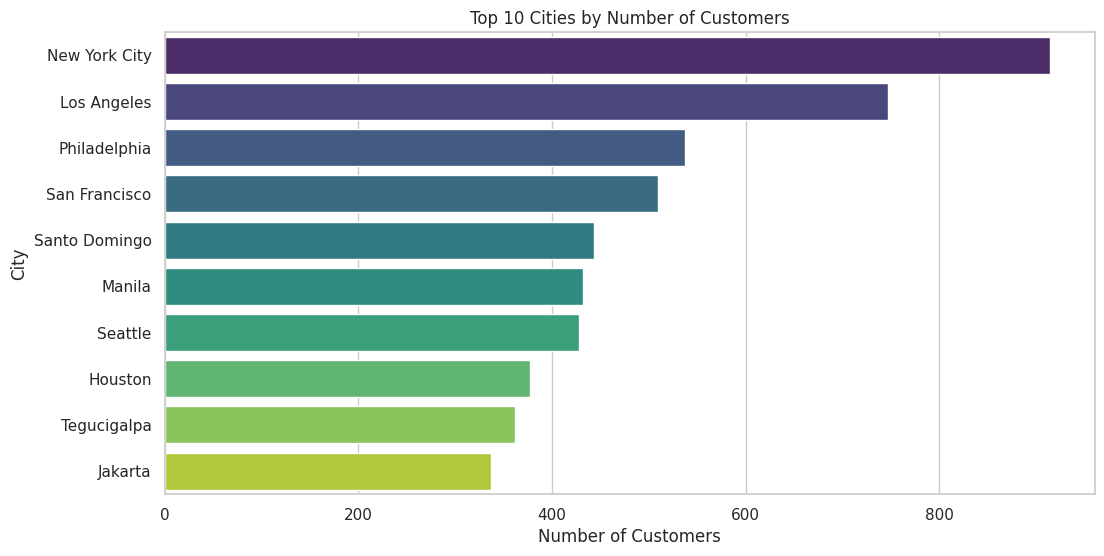

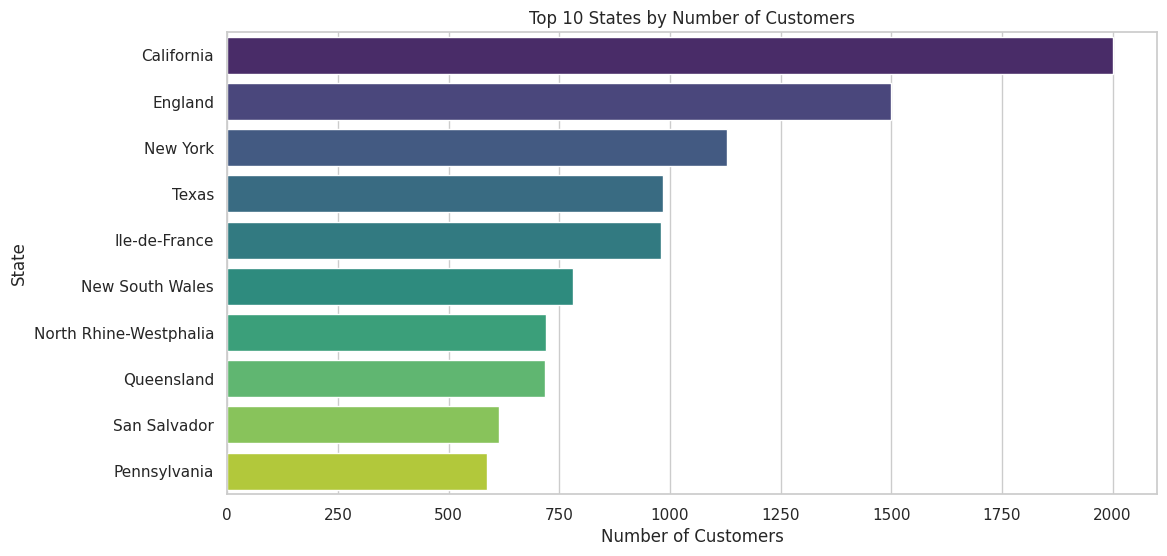

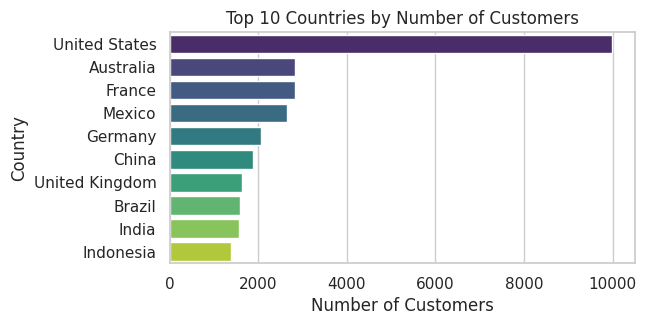

In [ ]:
# Distribution of Customers by City [VIZ]
plt.figure(figsize=(12, 6))
sns.barplot(data=city_distribution, x='Number of Customers', y='City', palette='viridis')
plt.title('Top 10 Cities by Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.show()

# Distribution of Customers by State [VIZ]
plt.figure(figsize=(12, 6))
sns.barplot(data=state_distribution, x='Number of Customers', y='State', palette='viridis')
plt.title('Top 10 States by Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('State')
plt.show()

# Distribution of Customers by Country [VIZ]
plt.figure(figsize=(6, 3))
sns.barplot(data=country_distribution, x='Number of Customers', y='Country', palette='viridis')
plt.title('Top 10 Countries by Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()

**3. Product Analysis**

    Top-Selling Products: Identify products with the highest sales

    Profitability Analysis: Determine the most and least profitable products
    
    Corellation of Order priority and Region connection

In [ ]:
# Top-Selling Products [EDA]
top_products = df.groupby('Product Name')[['Sales']].sum().reset_index()
top_products = top_products.sort_values(by='Sales', ascending=False).head(10)
top_products

,Product Name,Sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


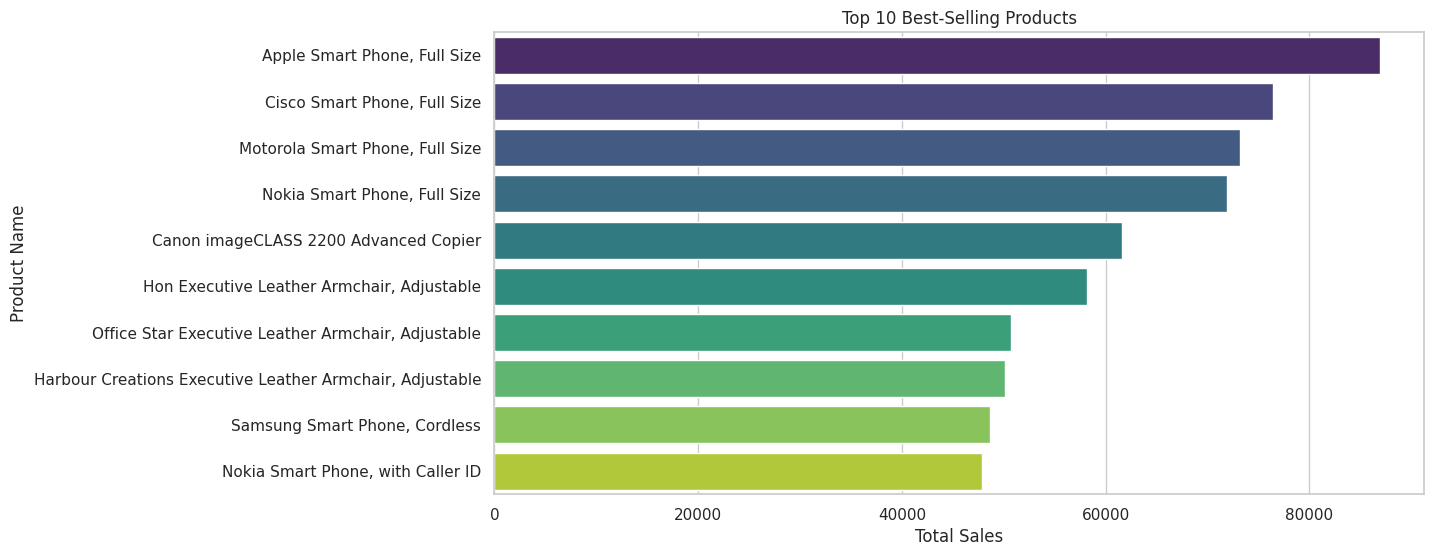

In [ ]:
#Top-Selling Products [VIZ]
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Sales', y='Product Name', palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

In [ ]:
# Most and Least Profitable Products [EDA]
product_profitability = df.groupby('Product Name')[['Profit']].sum().reset_index()
most_profitable_products = product_profitability.sort_values(by='Profit', ascending=False).head(10)
least_profitable_products = product_profitability.sort_values(by='Profit').head(10)
most_profitable_products, least_profitable_products

(                                           Product Name      Profit
 866               Canon imageCLASS 2200 Advanced Copier  25199.9280
 970                        Cisco Smart Phone, Full Size  17238.5206
 2415                    Motorola Smart Phone, Full Size  17027.1130
 1926                                  Hoover Stove, Red  11807.9690
 3098               Sauder Classic Bookcase, Traditional  10672.0730
 1714  Harbour Creations Executive Leather Armchair, ...  10427.3260
 2501                       Nokia Smart Phone, Full Size   9938.1955
 971                   Cisco Smart Phone, with Caller ID   9786.6408
 2502                  Nokia Smart Phone, with Caller ID   9465.3257
 589                                  Belkin Router, USB   8955.0180,
                                            Product Name     Profit
 1007          Cubify CubeX 3D Printer Double Head Print -8879.9704
 2233          Lexmark MX611dhe Monochrome Laser Printer -4589.9730
 2414                     Motorola S

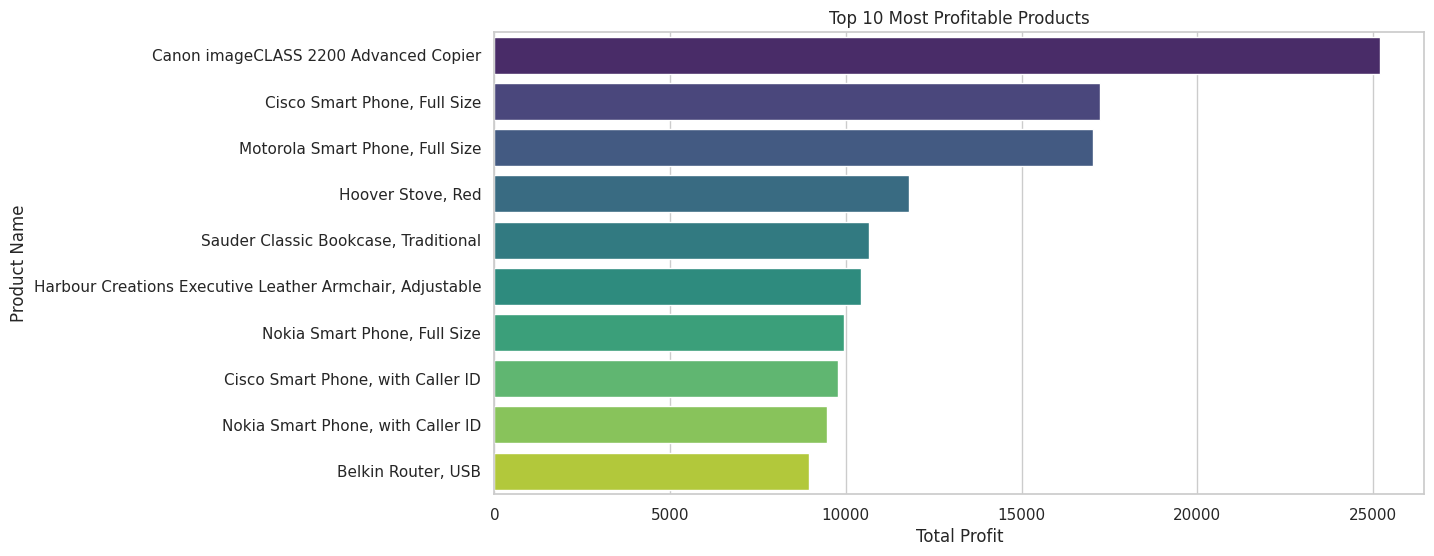

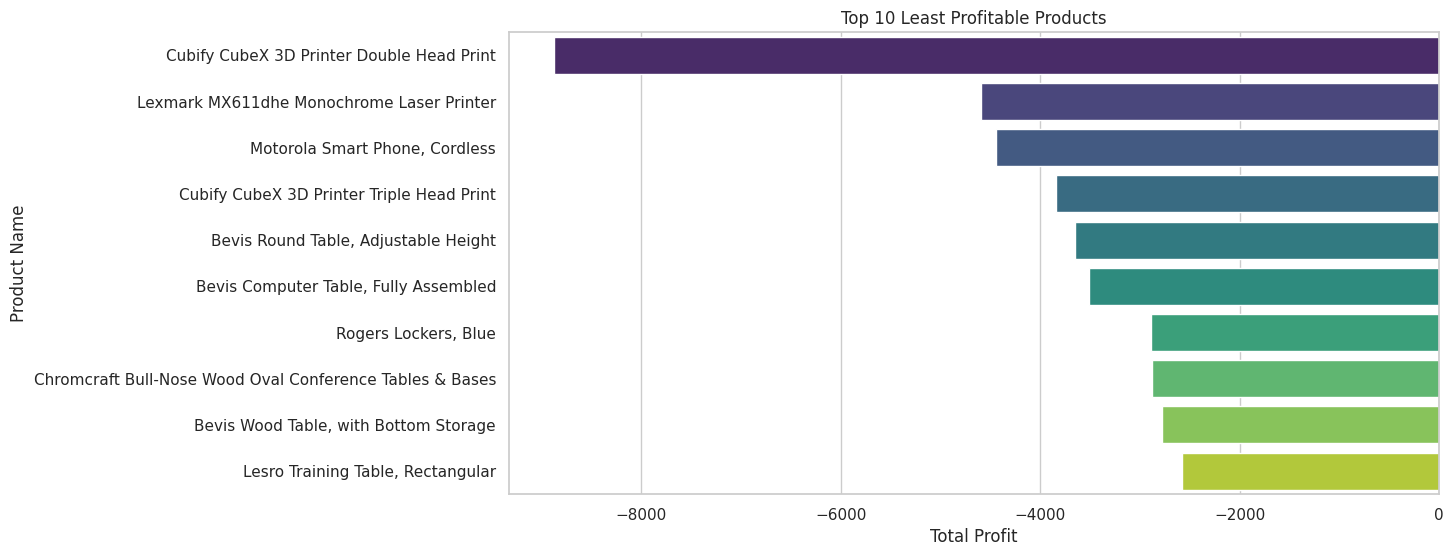

In [ ]:
# Most and Least Profitable Products [VIZ]
plt.figure(figsize=(12, 6))
sns.barplot(data=most_profitable_products, x='Profit', y='Product Name', palette='viridis')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=least_profitable_products, x='Profit', y='Product Name', palette='viridis')
plt.title('Top 10 Least Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

In [ ]:
# Order Priority and Region Connection [EDA]
order_priority_region = df.groupby(['Order Priority', 'Region'])[['Sales']].sum().reset_index()

# Sort by 'Order Priority' and then by 'Region'
order_priority_region = order_priority_region.sort_values(by=['Order Priority', 'Region'])
order_priority_region

,Order Priority,Region,Sales
0,Critical,Africa,7.591190e+04
1,Critical,Canada,7.402230e+03
2,Critical,Caribbean,1.785331e+04
3,Critical,Central,2.026053e+05
4,Critical,Central Asia,5.235625e+04
5,Critical,EMEA,7.450175e+04
6,Critical,East,5.508237e+04
7,Critical,North,7.981500e+04
8,Critical,North Asia,8.200206e+04
9,Critical,Oceania,8.540812e+04


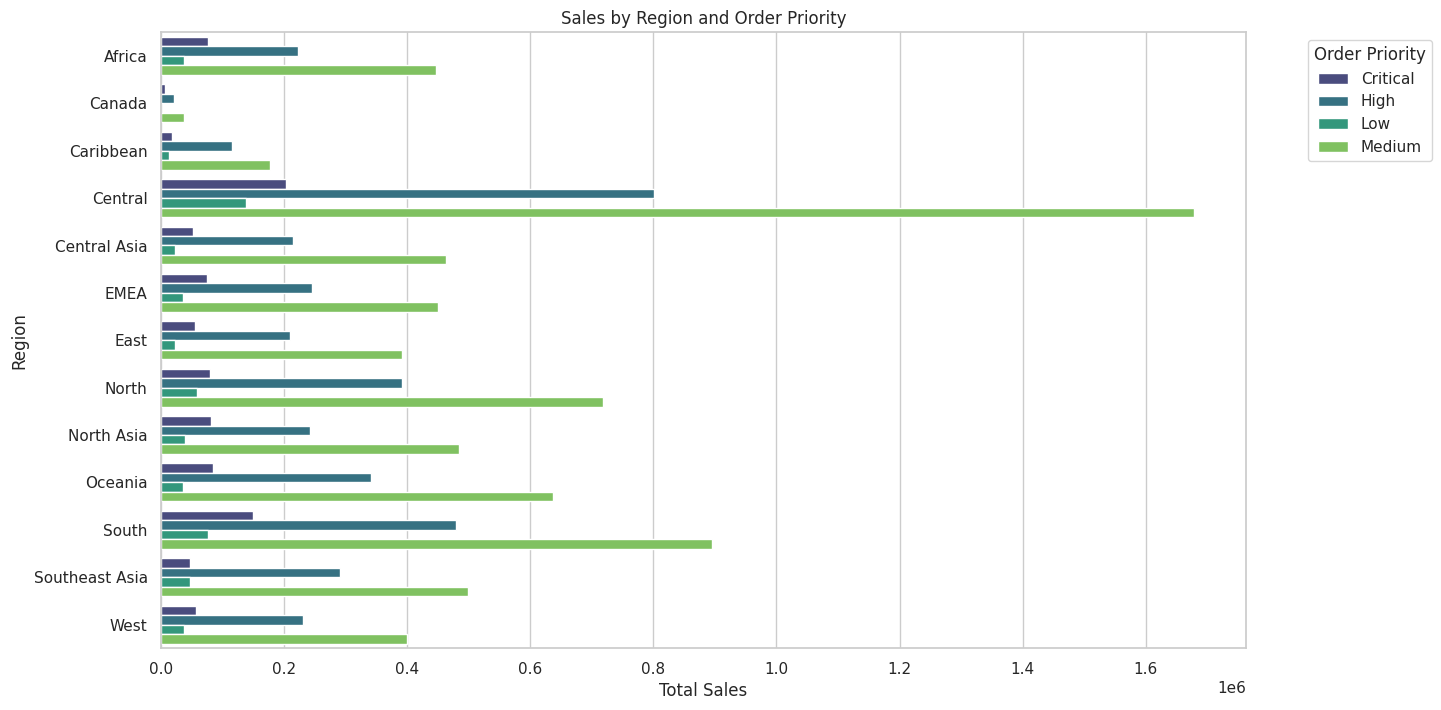

In [ ]:
# Order Priority and Region Connection [VIZ]
plt.figure(figsize=(14, 8))
sns.barplot(data=order_priority_region, x='Sales', y='Region', hue='Order Priority', palette='viridis')
plt.title('Sales by Region and Order Priority')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.legend(title='Order Priority', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**4.Shipping and Order Analysis**

    Order Processing Time: Calculate the average time between order date and ship date.
    
    Shipping Mode Analysis: Distribution of orders by different shipping modes and their impact on sales and profits.
    
    Region and category connection
    
    Shipping mode to shipping cost analysis
    
    Shipping cost to city analysis
    
    order priority vs shipping mode

In [ ]:
# Calculate the time difference between order date and ship date [EDA]
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Calculate the average processing time
average_processing_time = df['Processing Time'].mean()
average_processing_time

3.96937024761162

In [ ]:
# Distribution of orders by shipping mode [EDA]
shipping_mode_distribution = df['Ship Mode'].value_counts().reset_index()
shipping_mode_distribution.columns = ['Ship Mode', 'Number of Orders']

# Impact on sales and profits by shipping mode
shipping_mode_impact = df.groupby('Ship Mode')[['Sales', 'Profit']].sum().reset_index()
shipping_mode_impact

,Ship Mode,Sales,Profit
0,First Class,1.830976e+06,208104.67520
1,Same Day,6.672020e+05,76173.06780
2,Second Class,2.565672e+06,292583.52708
3,Standard Class,7.578652e+06,890596.02120


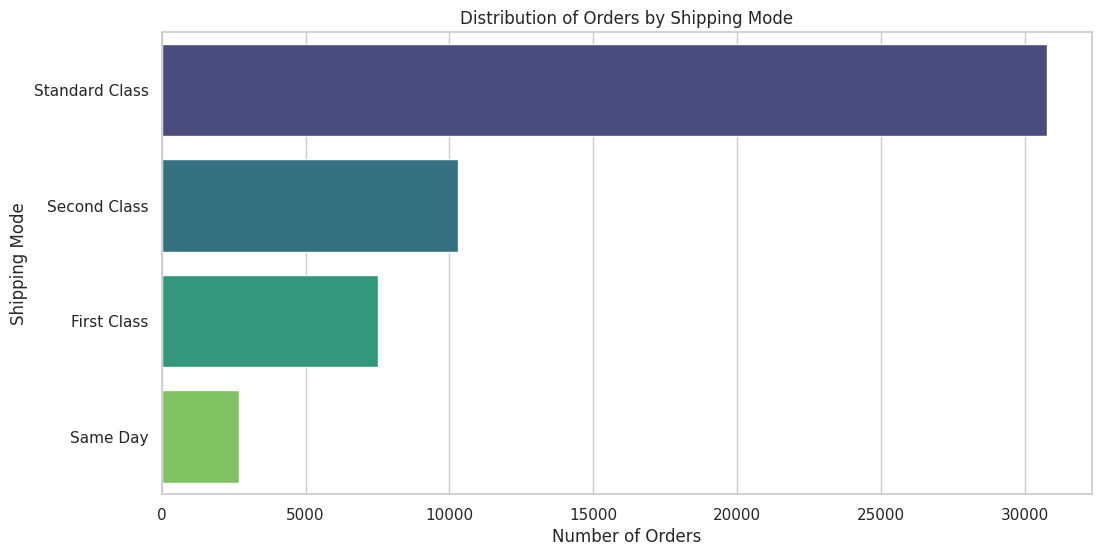

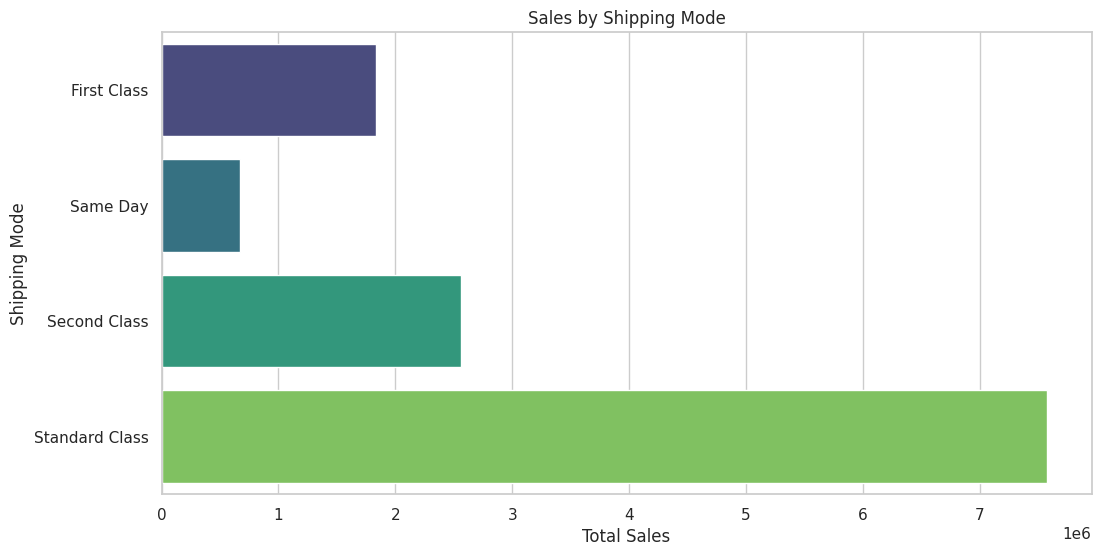

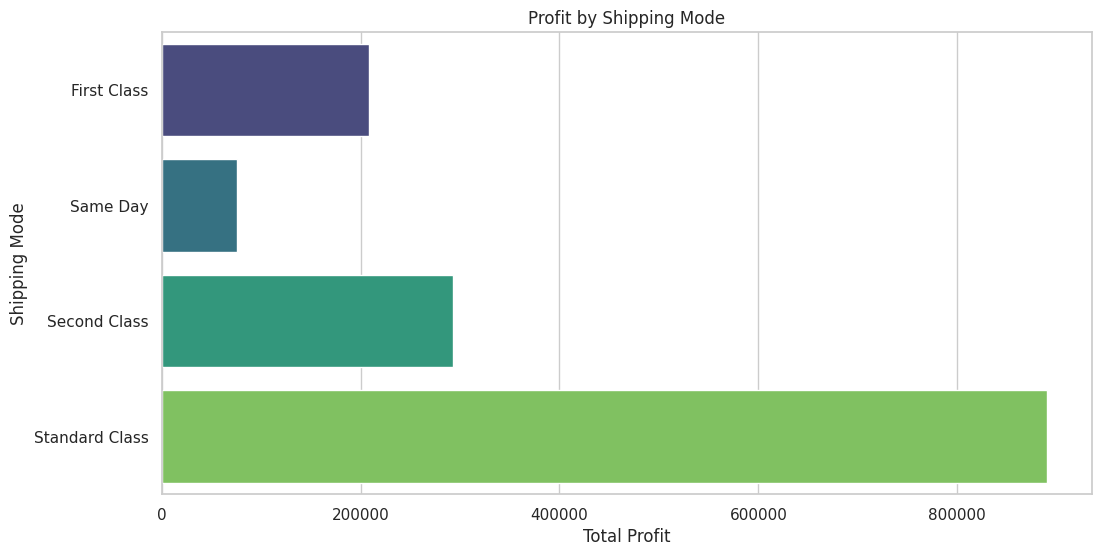

In [ ]:
# Distribution of orders by shipping mode [VIZ]
plt.figure(figsize=(12, 6))
sns.barplot(data=shipping_mode_distribution, x='Number of Orders', y='Ship Mode', palette='viridis')
plt.title('Distribution of Orders by Shipping Mode')
plt.xlabel('Number of Orders')
plt.ylabel('Shipping Mode')
plt.show()

# Impact on sales and profits by shipping mode [VIZ]
plt.figure(figsize=(12, 6))
sns.barplot(data=shipping_mode_impact, x='Sales', y='Ship Mode', palette='viridis')
plt.title('Sales by Shipping Mode')
plt.xlabel('Total Sales')
plt.ylabel('Shipping Mode')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=shipping_mode_impact, x='Profit', y='Ship Mode', palette='viridis')
plt.title('Profit by Shipping Mode')
plt.xlabel('Total Profit')
plt.ylabel('Shipping Mode')
plt.show()

In [ ]:
# Sales and Profit by Region and Category [EDA]
region_category = df.groupby(['Region', 'Category'])[['Sales', 'Profit']].sum().reset_index()
region_category

,Region,Category,Sales,Profit
0,Africa,Furniture,1.946506e+05,16262.08500
1,Africa,Office Supplies,2.667555e+05,28480.05300
2,Africa,Technology,3.223670e+05,44129.49300
3,Canada,Furniture,1.059528e+04,2613.24000
4,Canada,Office Supplies,3.003408e+04,7957.53000
5,Canada,Technology,2.629881e+04,7246.62000
6,Caribbean,Furniture,1.183724e+05,6223.46000
7,Caribbean,Office Supplies,8.957542e+04,14818.27600
8,Caribbean,Technology,1.163330e+05,13529.58504
9,Central,Furniture,8.604176e+05,54550.84010


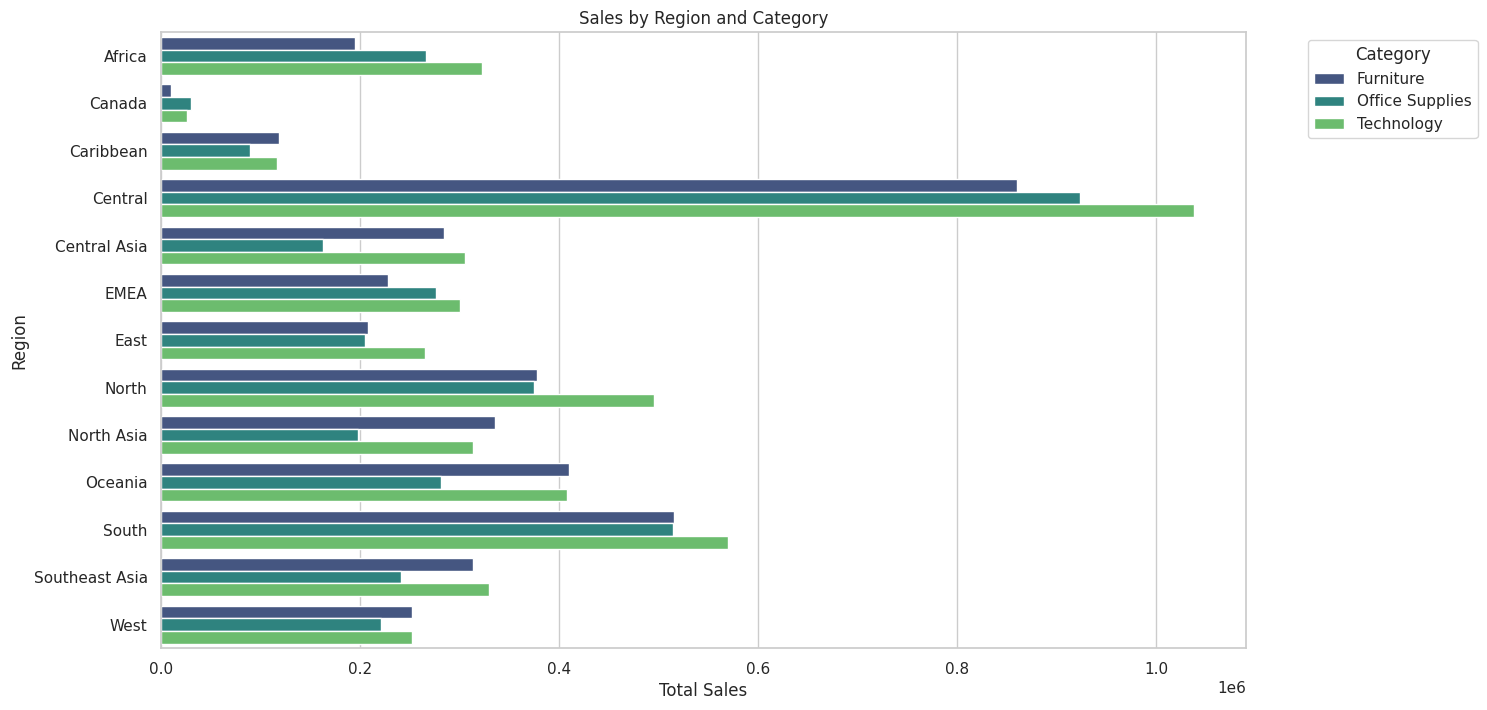

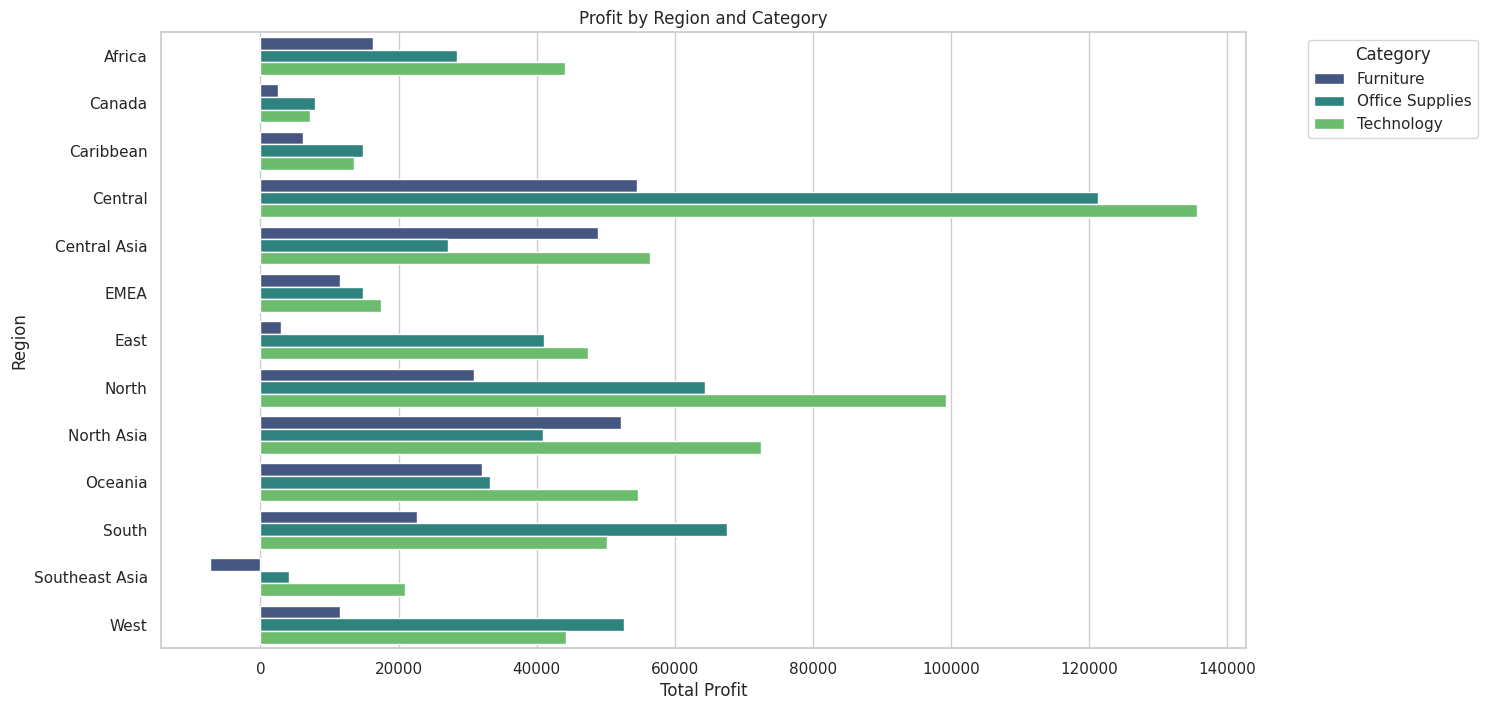

In [ ]:
# Sales and Profit by Region and Category [VIZ]
plt.figure(figsize=(14, 8))
sns.barplot(data=region_category, x='Sales', y='Region', hue='Category', palette='viridis')
plt.title('Sales by Region and Category')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(data=region_category, x='Profit', y='Region', hue='Category', palette='viridis')
plt.title('Profit by Region and Category')
plt.xlabel('Total Profit')
plt.ylabel('Region')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Average shipping cost by shipping mode [EDA]
shipping_mode_cost = df.groupby('Ship Mode')['Shipping Cost'].mean().reset_index()
shipping_mode_cost

,Ship Mode,Shipping Cost
0,First Class,41.053065
1,Same Day,42.937453
2,Second Class,30.469747
3,Standard Class,19.971755


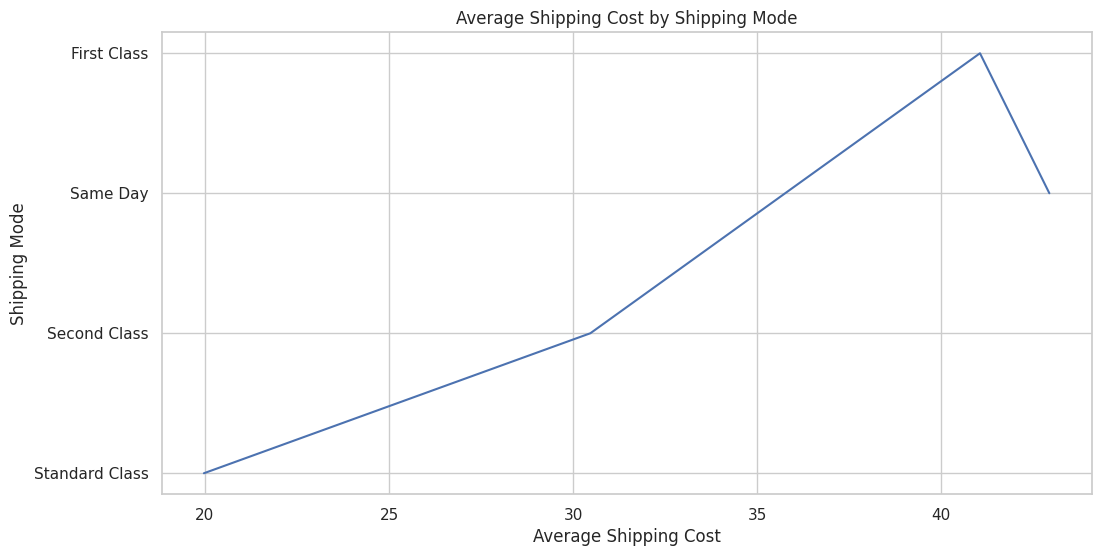

In [ ]:
# Average shipping cost by shipping mode [VIZ]
plt.figure(figsize=(12, 6))
sns.lineplot(data=shipping_mode_cost, x='Shipping Cost', y='Ship Mode')
plt.title('Average Shipping Cost by Shipping Mode')
plt.xlabel('Average Shipping Cost')
plt.ylabel('Shipping Mode')
plt.show()

In [ ]:
# Average shipping cost by city [EDA]
city_shipping_cost = df.groupby('City')['Shipping Cost'].mean().reset_index()
city_shipping_cost = city_shipping_cost.sort_values(by='Shipping Cost', ascending=False).head(10)
city_shipping_cost

,City,Shipping Cost
1593,Kamina,678.150
2466,PaysandÅ,634.530
336,Behshahr,630.970
2823,Salto,483.260
296,Barletta,325.450
1004,Elbasan,301.730
2530,Plaisir,255.965
123,Annecy-le-Vieux,246.170
1186,Girga,245.060
2544,Poitiers,236.230


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 147 (\x93) missing from current font.



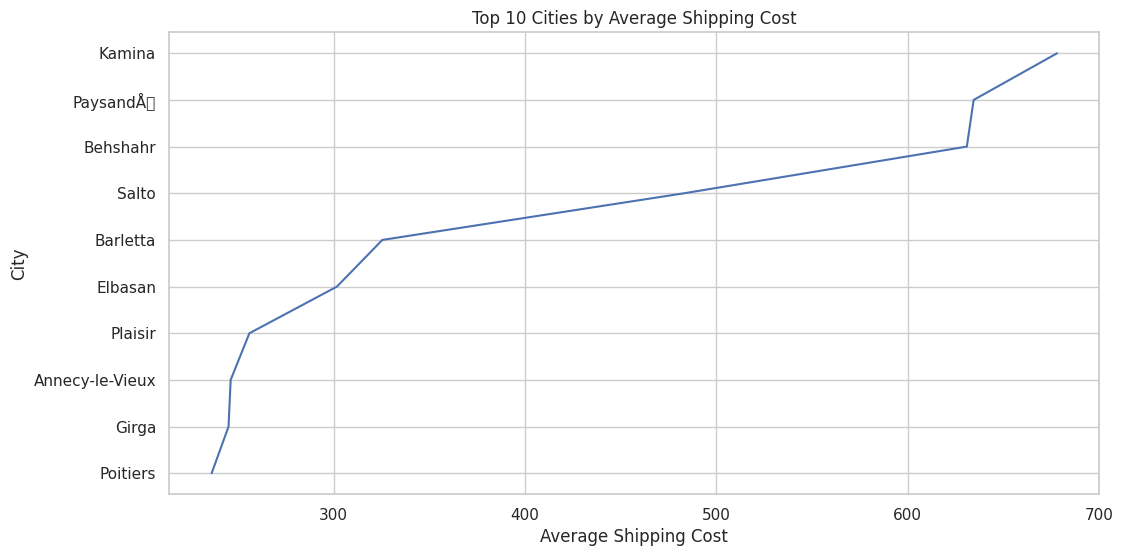

In [ ]:
# Average shipping cost by city [VIZ]
plt.figure(figsize=(12, 6))
sns.lineplot(data=city_shipping_cost, x='Shipping Cost', y='City')
plt.title('Top 10 Cities by Average Shipping Cost')
plt.xlabel('Average Shipping Cost')
plt.ylabel('City')
plt.show()

In [ ]:
# Order priority vs Shippiung Mode [EDA]
ship_mode_priority_count = df.groupby('Order Priority')['Ship Mode'].value_counts().unstack()

# Display the counts
print("Ship Mode Count by Order Priority:")
print(ship_mode_priority_count)

Ship Mode Count by Order Priority:
Ship Mode       First Class  Same Day  Second Class  Standard Class
Order Priority                                                     
Critical             1734.0     742.0        1456.0             NaN
High                 3413.0    1269.0        4010.0          6809.0
Low                     NaN       NaN           NaN          2424.0
Medium               2358.0     690.0        4843.0         21542.0


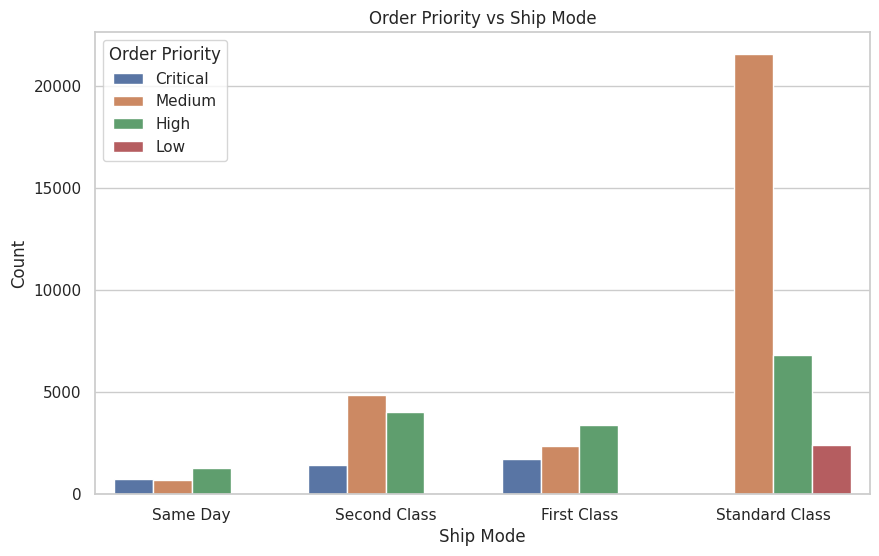

In [ ]:
#order priority vs ship mode [VIZ]
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ship Mode', hue='Order Priority')
plt.title('Order Priority vs Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.legend(title='Order Priority')
plt.show()

**5. Discount and Profit Analysis**

    Effect of Discounts on Sales: Analyze how different discount levels affect sales volume and profit.

    Profit Margins: Calculate profit margins for different products, categories, and regions.

In [ ]:
# Analysis of effect of discounts on sales and profit [EDA]
discount_analysis = df.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
discount_analysis

,Discount,Sales,Profit
0,0.000,6.992411e+06,1.770695e+06
1,0.002,2.613956e+05,5.797658e+04
2,0.070,1.216169e+05,2.114850e+04
3,0.100,1.579606e+06,2.590642e+05
4,0.150,3.060298e+05,2.737590e+04
5,0.170,2.473992e+05,2.816307e+04
6,0.200,1.203832e+06,1.177159e+05
7,0.202,1.621565e+04,-5.952727e+02
8,0.250,8.805535e+04,8.005875e+02
9,0.270,8.935167e+04,-1.675079e+03


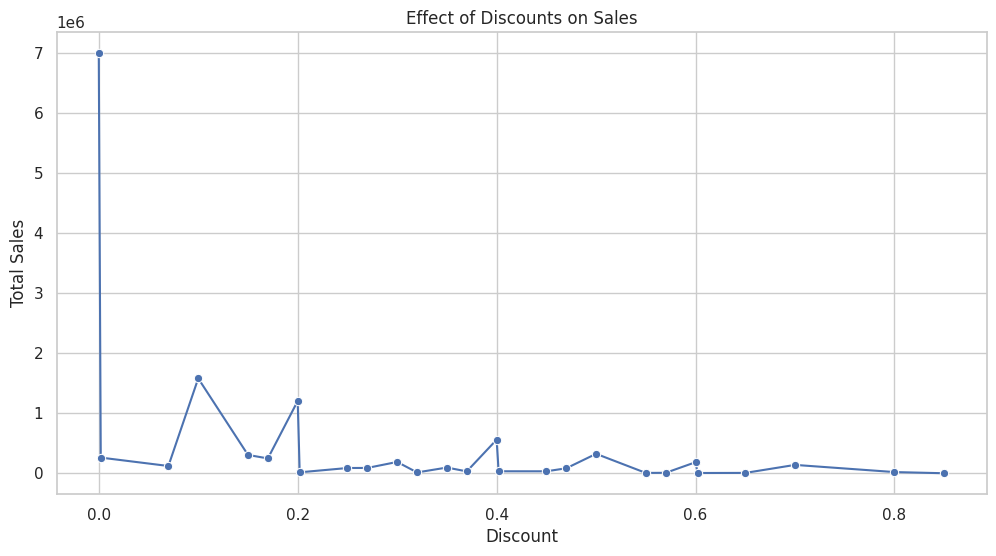

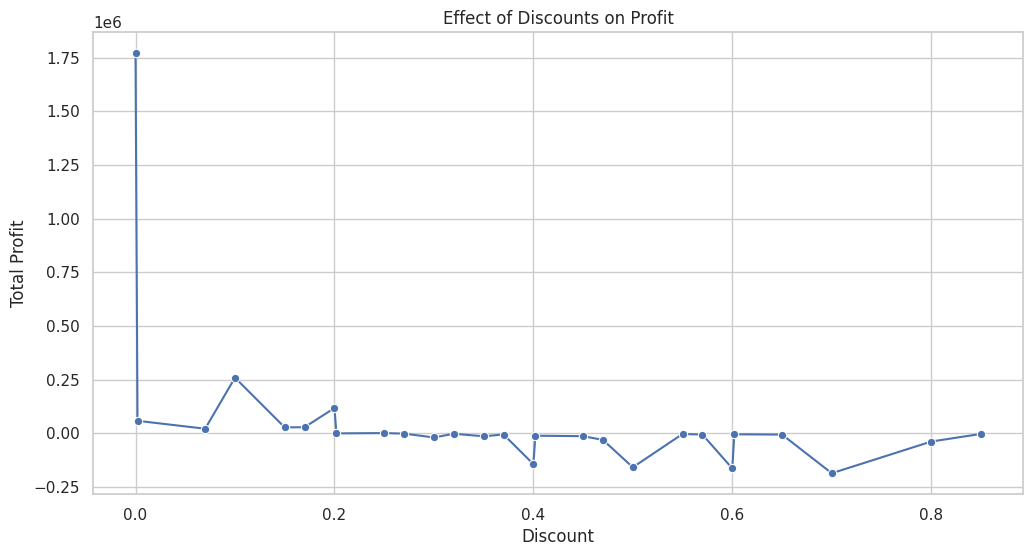

In [ ]:
# Visualization: Effect of Discounts on Sales [VIZ]
plt.figure(figsize=(12, 6))
sns.lineplot(data=discount_analysis, x='Discount', y='Sales', marker='o')
plt.title('Effect of Discounts on Sales')
plt.xlabel('Discount')
plt.ylabel('Total Sales')
plt.show()

# Visualization: Effect of Discounts on Profit [VIZ]
plt.figure(figsize=(12, 6))
sns.lineplot(data=discount_analysis, x='Discount', y='Profit', marker='o')
plt.title('Effect of Discounts on Profit')
plt.xlabel('Discount')
plt.ylabel('Total Profit')
plt.show()

In [ ]:
# Calculate profit margin [EDA]
df['Profit Margin'] = df['Profit'] / df['Sales']

# Profit margins by product
product_profit_margins = df.groupby('Product Name')['Profit Margin'].mean().reset_index()
product_profit_margins = product_profit_margins.sort_values(by='Profit Margin', ascending=False).head(10)
product_profit_margins

,Product Name,Profit Margin
3457,Tops Green Bar Computer Printout Paper,0.50
178,Adams Telephone Message Book w/Frequently-Call...,0.50
3233,Southworth Structures Collection,0.50
867,Canon imageCLASS MF7460 Monochrome Digital Las...,0.50
3587,Xerox 1890,0.50
346,Avery 475,0.50
373,Avery 5,0.49
3617,Xerox 1918,0.49
3692,Xerox 1987,0.49
986,Color-Coded Legal Exhibit Labels,0.49


In [ ]:
# Profit margins by category [EDA]
category_profit_margins = df.groupby('Category')['Profit Margin'].mean().reset_index()
category_profit_margins = category_profit_margins.sort_values(by='Profit Margin', ascending=False)
category_profit_margins

,Category,Profit Margin
1,Office Supplies,0.058965
2,Technology,0.049679
0,Furniture,0.008593


In [ ]:
# Profit margins by region [EDA]
region_profit_margins = df.groupby('Region')['Profit Margin'].mean().reset_index()
region_profit_margins = region_profit_margins.sort_values(by='Profit Margin', ascending=False)
region_profit_margins

,Region,Profit Margin
1,Canada,0.247500
12,West,0.219487
8,North Asia,0.179554
6,East,0.167227
4,Central Asia,0.146929
7,North,0.125245
9,Oceania,0.083471
2,Caribbean,0.080944
3,Central,0.060177
10,South,0.053810


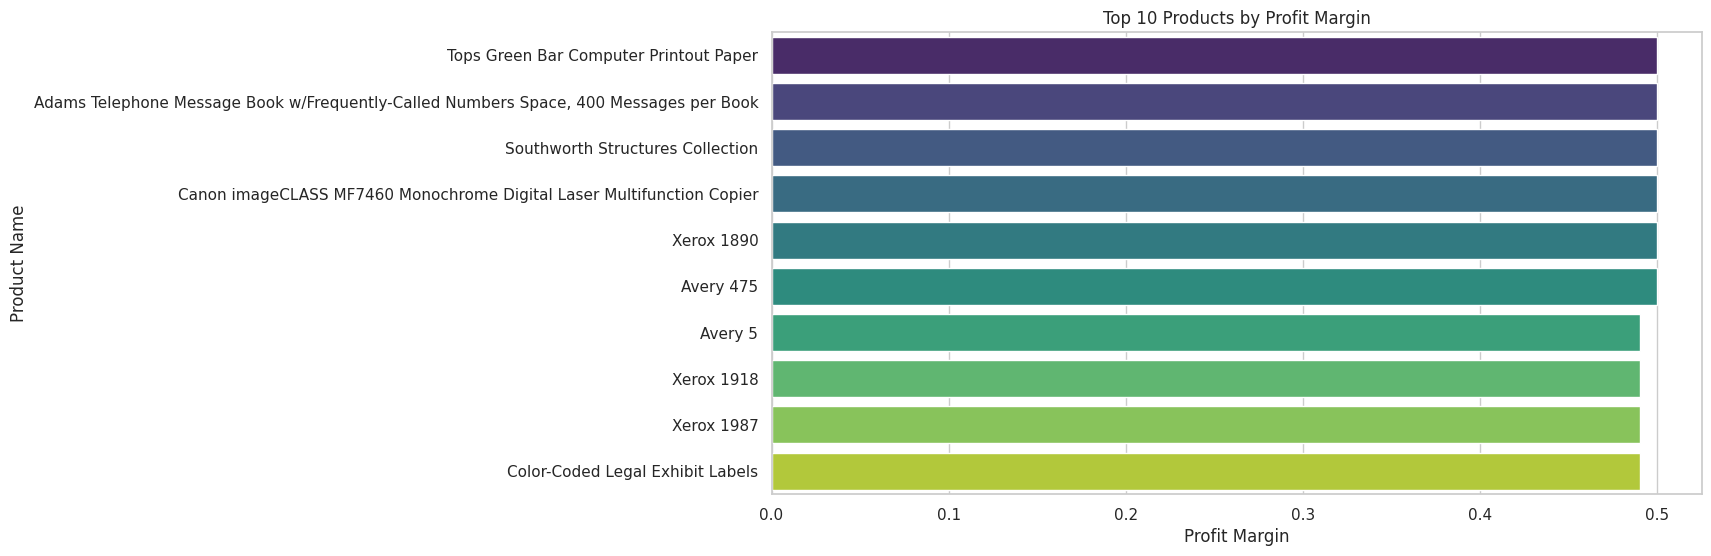

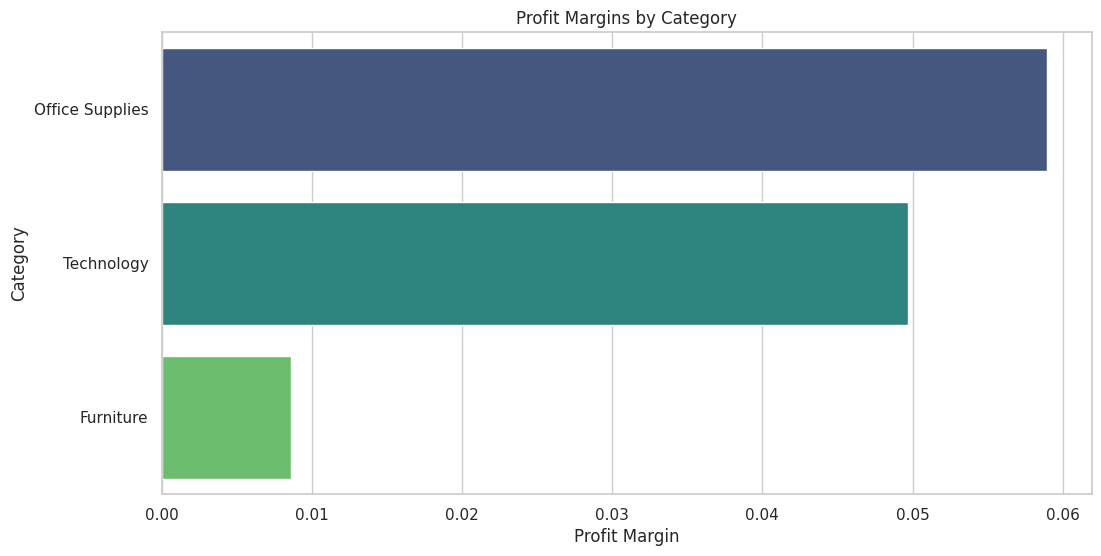

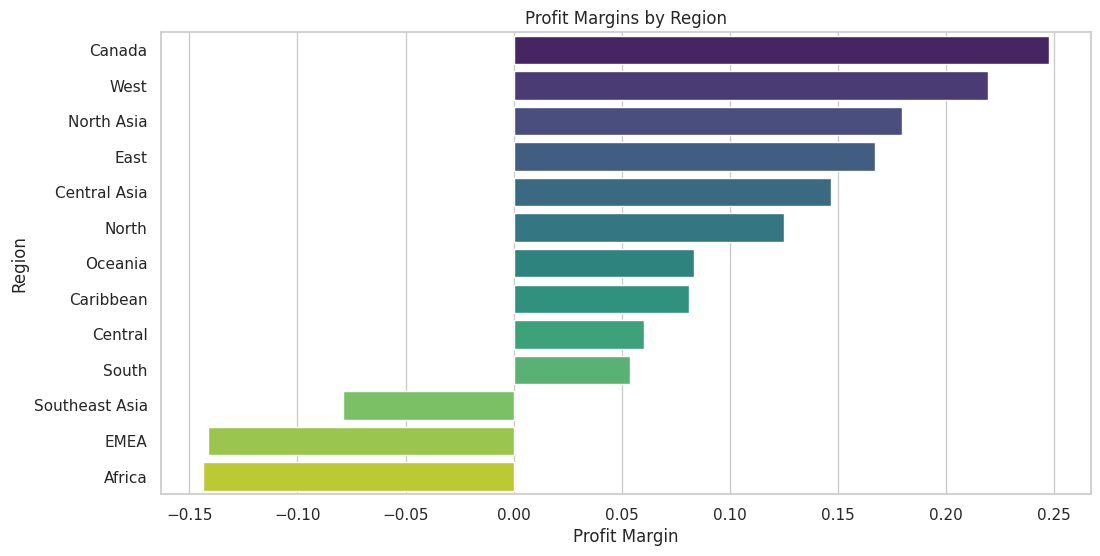

In [ ]:
# Visualization: Profit Margins by Product [VIZ]
plt.figure(figsize=(12, 6))
sns.barplot(data=product_profit_margins, x='Profit Margin', y='Product Name', palette='viridis')
plt.title('Top 10 Products by Profit Margin')
plt.xlabel('Profit Margin')
plt.ylabel('Product Name')
plt.show()

# Visualization: Profit Margins by Category [VIZ]
plt.figure(figsize=(12, 6))
sns.barplot(data=category_profit_margins, x='Profit Margin', y='Category', palette='viridis')
plt.title('Profit Margins by Category')
plt.xlabel('Profit Margin')
plt.ylabel('Category')
plt.show()

# Visualization: Profit Margins by Region [VIZ]
plt.figure(figsize=(12, 6))
sns.barplot(data=region_profit_margins, x='Profit Margin', y='Region', palette='viridis')
plt.title('Profit Margins by Region')
plt.xlabel('Profit Margin')
plt.ylabel('Region')
plt.show()

**6. Market Analysis**

    Market Performance: Sales and profit analysis by different markets.

    Regional Market Trends: Identify trends and patterns in different regions.

In [ ]:
# Sales and Profit by Market [EDA]
market_performance = df.groupby('Market')[['Sales', 'Profit']].sum().reset_index()
market_performance


,Market,Sales,Profit
0,APAC,3.585744e+06,436000.04900
1,Africa,7.837732e+05,88871.63100
2,Canada,6.692817e+04,17817.39000
3,EMEA,8.061613e+05,43897.97100
4,EU,2.938089e+06,372829.74150
5,LATAM,2.164605e+06,221643.48708
6,US,2.297201e+06,286397.02170


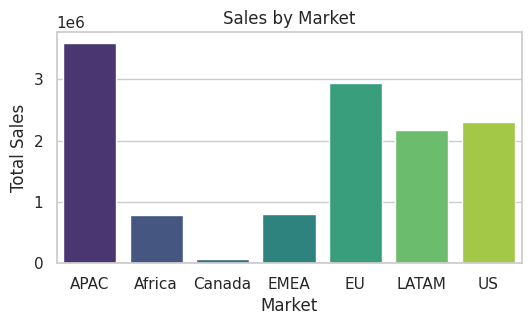

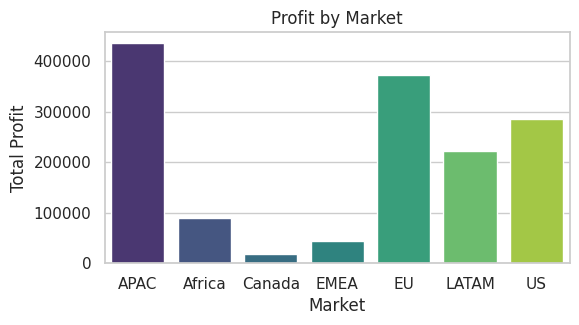

In [ ]:
# Visualization of Sales and Profit by Market [VIZ]
plt.figure(figsize=(6, 3))
sns.barplot(data=market_performance, x='Market', y='Sales', palette='viridis')
plt.title('Sales by Market')
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(6, 3))
sns.barplot(data=market_performance, x='Market', y='Profit', palette='viridis')
plt.title('Profit by Market')
plt.xlabel('Market')
plt.ylabel('Total Profit')
plt.show()

In [ ]:
# Sales and Profit by Region over Time (Monthly) [EDA]
df['Order Date'] = pd.to_datetime(df['Order Date'])
region_trends = df.resample('M', on='Order Date').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
region_trends = df.groupby([df['Order Date'].dt.to_period('M'), 'Region']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
region_trends['Order Date'] = region_trends['Order Date'].dt.to_timestamp()
region_trends

,Order Date,Region,Sales,Profit
0,2011-01-01,Africa,11740.89900,1551.48900
1,2011-01-01,Canada,330.51000,8.82000
2,2011-01-01,Caribbean,733.21600,29.41600
3,2011-01-01,Central,23435.66274,2542.10694
4,2011-01-01,Central Asia,622.71000,160.11000
...,...,...,...,...
618,2014-12-01,North Asia,24160.37100,5775.50100
619,2014-12-01,Oceania,32944.38300,2112.39300
620,2014-12-01,South,63704.88108,6891.86648
621,2014-12-01,Southeast Asia,50121.48030,1339.66030


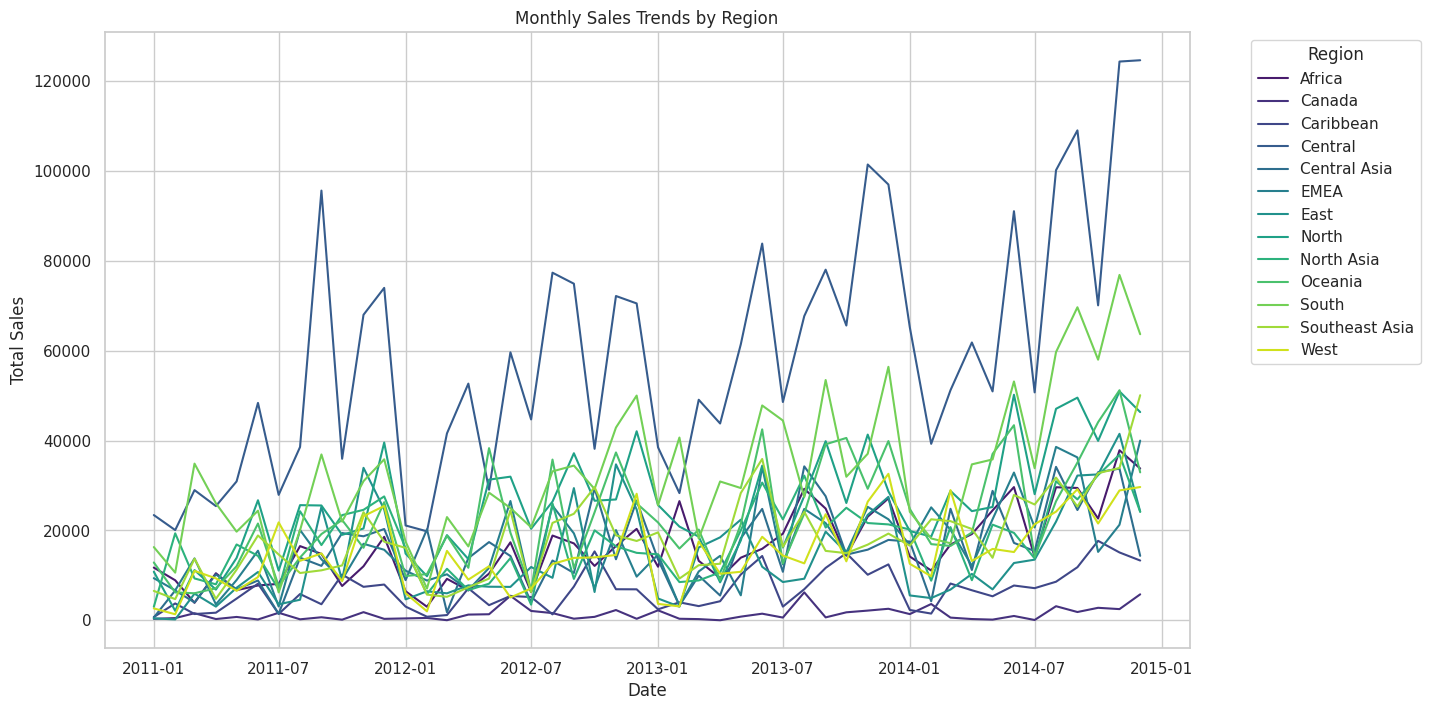

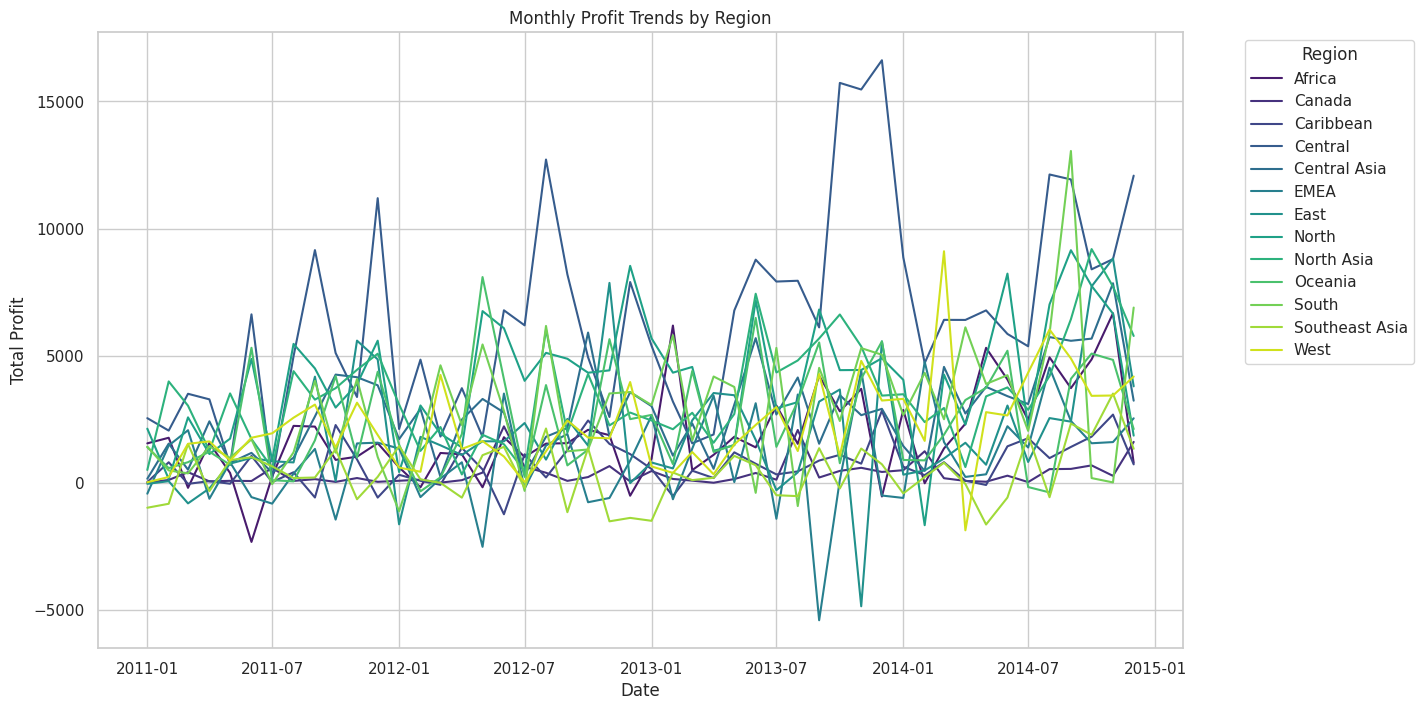

In [ ]:
# Visualization of Sales Trends by Region over Time (Monthly) [VIZ]
plt.figure(figsize=(14, 8))
sns.lineplot(data=region_trends, x='Order Date', y='Sales', hue='Region', palette='viridis')
plt.title('Monthly Sales Trends by Region')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualization of Profit Trends by Region over Time (Monthly) [VIZ]
plt.figure(figsize=(14, 8))
sns.lineplot(data=region_trends, x='Order Date', y='Profit', hue='Region', palette='viridis')
plt.title('Monthly Profit Trends by Region')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**7. Correlation and Trends**

    Shipping Cost vs. Profit: Determine the impact of shipping costs on overall profitability.

    Quantity vs. Sales: Relationship between the quantity of products sold and total sales.

    Sales vs. Profit by customer segment: Analyze the relationship between sales and profit.

In [ ]:
# Correlation between Shipping Cost and Profit [EDA]
shipping_cost_profit_correlation = df[['Shipping Cost', 'Profit']].corr().iloc[0, 1]
shipping_cost_profit_correlation

0.3544409015326784

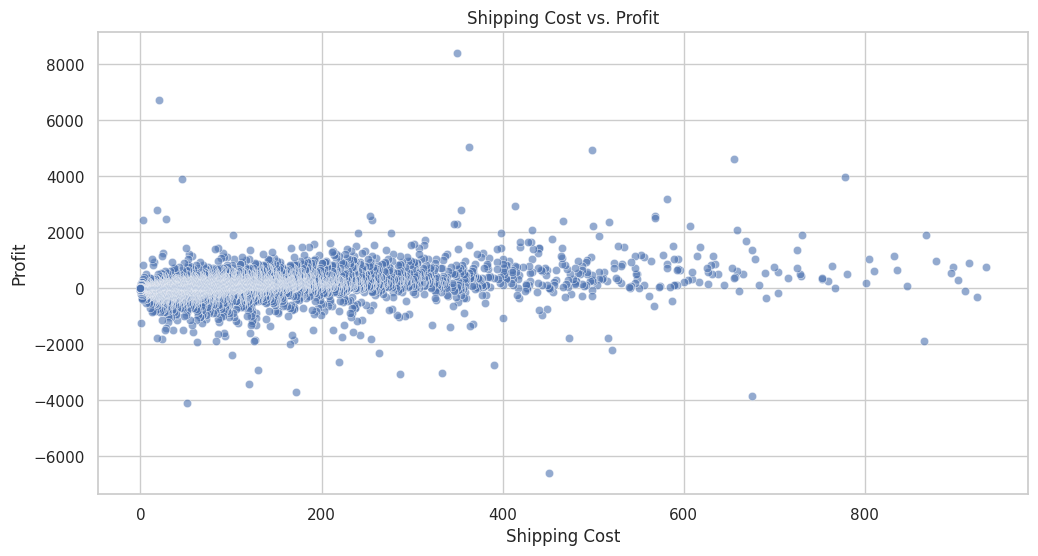

In [ ]:
# Scatter plot for Shipping Cost vs. Profit [VIZ]
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Shipping Cost', y='Profit', alpha=0.6)
plt.title('Shipping Cost vs. Profit')
plt.xlabel('Shipping Cost')
plt.ylabel('Profit')
plt.show()

In [ ]:
# Correlation between Quantity and Sales [EDA]
quantity_sales_correlation = df[['Quantity', 'Sales']].corr().iloc[0, 1]
quantity_sales_correlation

0.31357718095479853

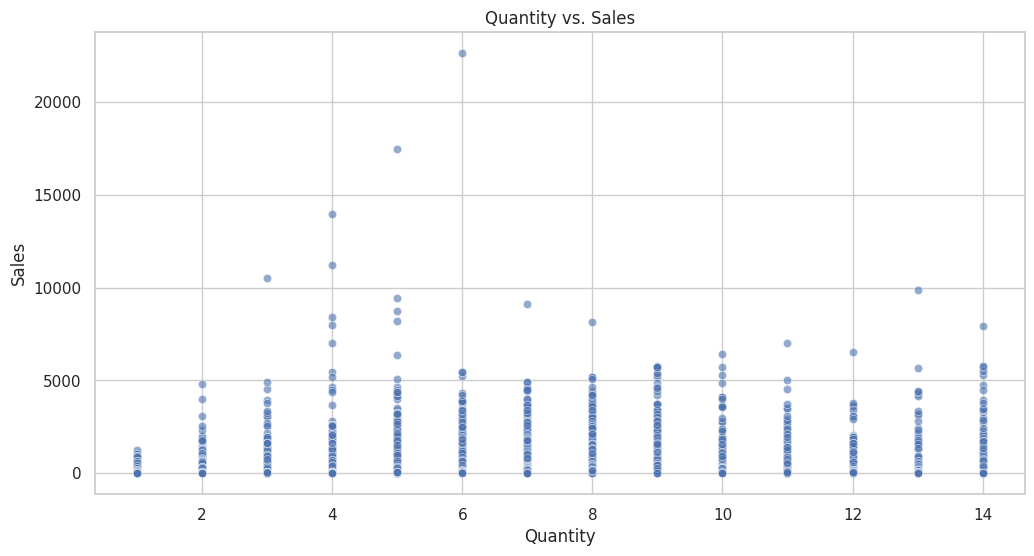

In [ ]:
# Scatter plot for Quantity vs. Sales [VIZ]
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Quantity', y='Sales', alpha=0.6)
plt.title('Quantity vs. Sales')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.show()

In [ ]:
#Assuming df is your DataFrame and 'Segment' is the column to group by [EDA]
segment_analysis = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

# Calculate Profit Percentage
segment_analysis['Profit Percentage'] = (segment_analysis['Profit'] / segment_analysis['Sales']) * 100

# Display the updated DataFrame
print(segment_analysis)

       Segment         Sales        Profit  Profit Percentage
0     Consumer  6.507949e+06  749239.78206          11.512686
1    Corporate  3.824698e+06  441208.32866          11.535771
2  Home Office  2.309855e+06  277009.18056          11.992492


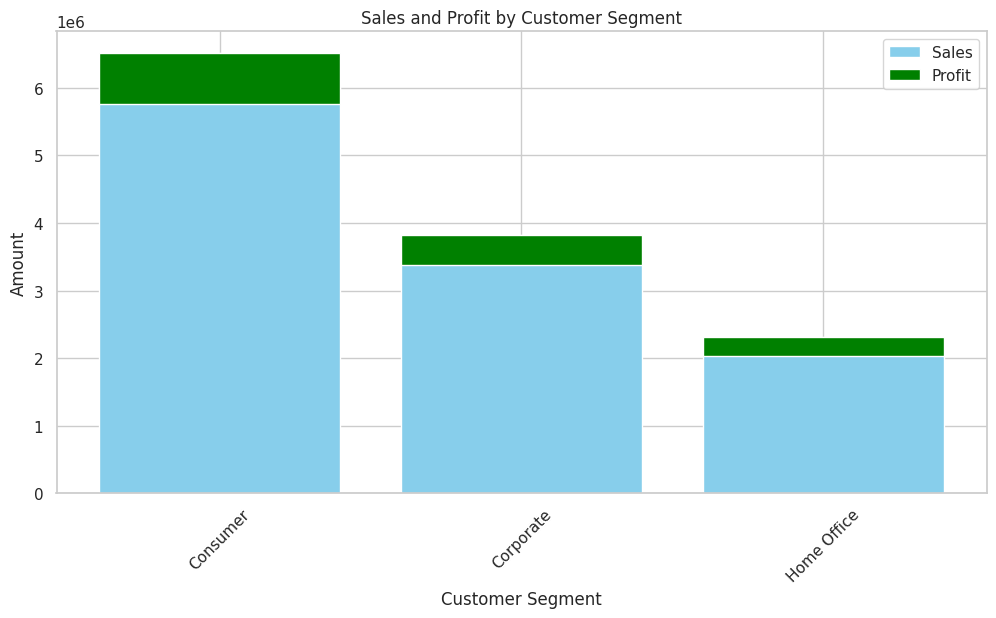

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

# Stacked bar chart [VIZ]
ax.bar(segment_analysis['Segment'], segment_analysis['Sales'], label='Sales', color='skyblue')
ax.bar(segment_analysis['Segment'], segment_analysis['Profit'], label='Profit', color='green', bottom=segment_analysis['Sales'] - segment_analysis['Profit'])
ax.set_title('Sales and Profit by Customer Segment')
ax.set_xlabel('Customer Segment')
ax.set_ylabel('Amount')
ax.legend()

plt.xticks(rotation=45)
plt.show()

# 5. Feature Engineering and visulization

Feature engineering is the process of using domain knowledge to create new features (input variables) from raw data to improve the performance of machine learning models. In the context of Exploratory Data Analysis (EDA), feature engineering involves transforming and enhancing the dataset to uncover insights and patterns that may not be immediately apparent.



**Benefits of Feature Engineering in EDA:**

Improved Model Performance: Well-engineered features can enhance the predictive power of machine learning models.
Better Insights: New features can reveal hidden patterns and relationships within the data.
Enhanced Understanding: Helps in understanding the underlying structure of the data and the factors influencing the target variable.
In summary, feature engineering is a crucial step in EDA and the overall data preprocessing pipeline, enabling more effective analysis and model building by transforming raw data into meaningful features.

**some additional features after feature engineering:**

  Sales per Day: Calculate the sales per day for each order.

  Profit per Day: Calculate the profit per day for each order.

  Discounted Sales: Calculate the effective sales after considering the discount.
  
  High Discount Flag: Create a flag indicating whether a discount is higher than a certain threshold (e.g., 20%).

In [ ]:
# FEATURE ENGINEERING EDA CODE

# Convert dates to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate the number of days between order date and ship date
df['Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Calculate Sales per Day
df['Sales per Day'] = df['Sales'] / df['Processing Time']

# Calculate Profit per Day
df['Profit per Day'] = df['Profit'] / df['Processing Time']

# Calculate Discounted Sales
df['Discounted Sales'] = df['Sales'] * (1 - df['Discount'])

# Create High Discount Flag
df['High Discount Flag'] = df['Discount'] > 0.2

# Replace infinities and NaNs resulting from divisions by zero
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

In [ ]:
# Display the updated dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Processing Time,Profit Margin,Sales per Day,Profit per Day,Discounted Sales,High Discount Flag
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,0,0.330000,0.0000,0.0000,2309.6500,False
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2,-0.077847,1854.6975,-144.3825,3338.4555,False
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,1,0.177766,5175.1710,919.9710,4657.6539,False
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2,-0.033376,1446.2550,-48.2700,2603.2590,False
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,1,0.109963,2832.9600,311.5200,2832.9600,False


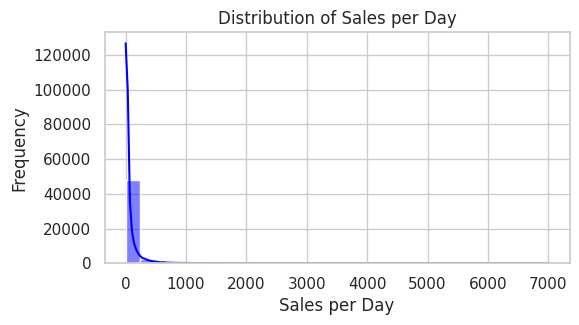

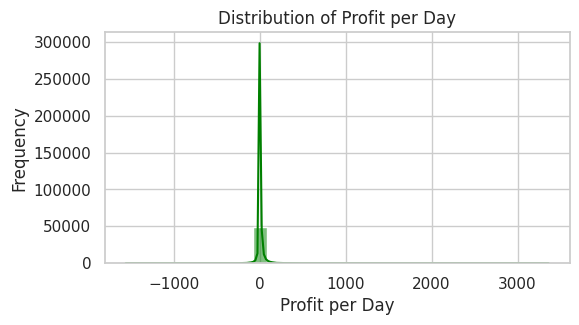

In [ ]:
# Distribution of Sales per Day [VIZ]
plt.figure(figsize=(6, 3))
sns.histplot(df['Sales per Day'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sales per Day')
plt.xlabel('Sales per Day')
plt.ylabel('Frequency')
plt.show()

# Distribution of Profit per Day [VIZ]
plt.figure(figsize=(6, 3))
sns.histplot(df['Profit per Day'], bins=30, kde=True, color='green')
plt.title('Distribution of Profit per Day')
plt.xlabel('Profit per Day')
plt.ylabel('Frequency')
plt.show()

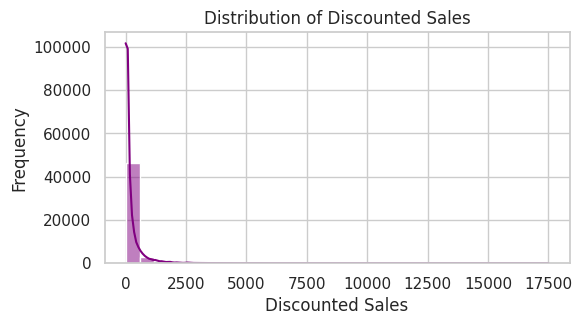

In [ ]:
# Distribution of Discounted Sales [VIZ]
plt.figure(figsize=(6, 3))
sns.histplot(df['Discounted Sales'], bins=30, kde=True, color='purple')
plt.title('Distribution of Discounted Sales')
plt.xlabel('Discounted Sales')
plt.ylabel('Frequency')
plt.show()

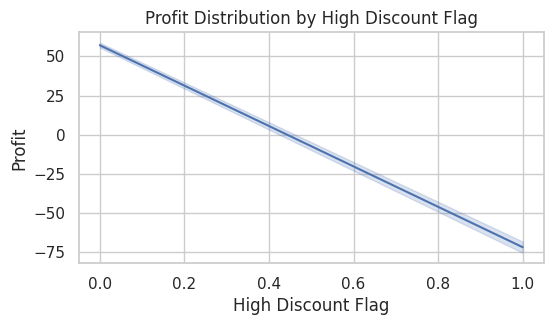

In [ ]:
# Boxplot of Profit grouped by High Discount Flag [VIZ]
plt.figure(figsize=(6, 3))
sns.lineplot(data=df, x='High Discount Flag', y='Profit')
plt.title('Profit Distribution by High Discount Flag')
plt.xlabel('High Discount Flag')
plt.ylabel('Profit')
plt.show()

### **Insight Analysis of feature engineering above**

Sales per Day and Profit per Day: Analyzing these distributions can help identify the efficiency of processing orders. Higher values might indicate faster processing times with substantial sales or profit.

Discounted Sales: This can show how discounts impact actual sales. Comparing this with the original sales can help measure the effectiveness of discount strategies.

High Discount Flag Impact on Profit: Understanding how high discounts affect profit can help in making strategic decisions about discount offerings.